# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [21]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import csr_matrix
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from scipy.sparse import csr_matrix
import os
from scipy.sparse import vstack
from sklearn.preprocessing import normalize


# Downloading DataSet From Kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "jerinsebastian"
os.environ['KAGGLE_KEY'] = "4d3094a0fa1807134b65962896a605fd"
!kaggle competitions download -c malware-classification

 82%|███████████████████████████████       | 28.9G/35.3G [04:53<01:10, 97.1MB/s]

In [ ]:
!7z e train.7z -o/home/jseb3723/asmFiles *.asm -r

# Unzipping And Extracting Data

In [16]:
from zipfile import ZipFile
zf = ZipFile('malware-classification.zip','r')
zf.extractall('malware-classification')
zf.close()

In [ ]:
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall(path="train")
archive.close()

In [6]:
#separating byte files and asm files 

source = '/home/jseb3723/train/train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination_1)
#         if (file.endswith("asm")):
#             shutil.move(source+'/'+file,destination_2)

fwMvl83WJ5KB01UN4ckC.bytes
gUSm1WN6PBYQabnrLs7h.asm
EV5y3k4OfPat2g0TAbHl.asm
HsVToFPyNZdRic2hfQgA.bytes
ISEbDYCrtqnGOPg3Qdzh.bytes
i6HCJxaZV5cBzW1NUuof.asm
hnMRIAswZOPolcxpUJe3.bytes
2VvzfnrS4LiIEgCYws1J.bytes
d9iovbGSauIRnmtK7e6E.asm
fiFAPn9E6NWzh2ad48R1.asm
bWMTEq0N6d7KRZhvigGQ.bytes
6FPdv92ayjKlUWbLmXS3.asm
IFGzJ3dxjPurAUXKwpgl.bytes
dCgw930c1Ztmr4XNsVH6.bytes
C5zRPoaif3nALEsq6vJk.asm
d4lM2k7aq1RwJuTpgO6X.bytes
eMZYXFS0jiHTV5y742UC.asm
iAFZ8be3gGIJcK9uHwEy.bytes
697TFDm0KRiZIgB4pJG1.asm
d8xwlCsZztFpTnjSRWf3.asm
CW6cHidJb35VTMQ0jms7.bytes
JMSXw23bN7gKfCeWAxVY.asm
hJO6AGKpk2U1PqiX97cr.asm
HfMdBXIbuSaZxGT5W4h1.bytes
FT2MUWLyVQ1ERiCfgckH.bytes
IQJlrKuUAyj4seftWL2b.bytes
g9izZfbqECNJw7RojkIY.bytes
8sOeqTYU0DtZNML4HVKW.asm
JNez4Z10tfKa52BDCkVb.asm
9kcl1e37zbpLWTPhSoiH.asm
BZyd9n1Lik5loVQWYgJR.asm
FdMkgDZaeJus2vTPIxGH.bytes
c1Bwr4tG0v6IoiP72MgX.asm
EBghIvP2MTJU6GXkAROm.asm
ELuV9FA7IjKXR52NrokU.asm
9yEvV8KfDm3hcUZPqBe0.asm
5rtfSP91u3LJsbzMVWnw.asm
DjV4Jdp805avuimhTBNX.asm
c9tj6deKFW4zDfOvE5

63HKnjiLmSp5qC09Us7u.bytes
g46fdQWzcnK0rBGUJs3j.asm
5MrYiQtEc4lwyBRWh8GJ.asm
1YBJRhWOvlpHx79EMf2I.bytes
EpBVNQnoMzYaCbe96OZx.bytes
1WCXg8qEtJFITMilaf6k.asm
iQDcR43OKXIJzT5WV8AH.asm
3DPkmSKTydJUFQ19Ol4s.asm
fadiNIzQsxUMBElZgc97.asm
0csgzpwdL3FbZEJu6DjO.bytes
8KeOIvQaxRdsU7mu6CrL.asm
h2dbAkqv6HaWu1wljRcF.asm
741Fqpl2jCHVTQdnMJmv.bytes
9M6r8hsleUKTmvfB7Yn2.asm
EpVF6whltPArouQzvC34.bytes
Ef5DsSKLm8l6Bn4eoMv0.bytes
DUxrn3L5C2qcjMF9PkER.asm
AFiruP53lsbNCjnkoIyM.asm
jpT74BziaEYAtIfhnyW0.asm
fJrQ8Y32EzevA5DOitRN.asm
c35p2bKLvCUAko96VwdI.asm
7KqfVlEBOmr6tTQewNG8.asm
0XSHfwZAgYm7eFVInuDT.asm
Jbv0zUjcOhsALd5waN8F.asm
cVYX2gTrFnB3HfP8m5U9.asm
FOijJzZuSwWcCkbHEgTx.bytes
07ECKjDTyQLnabNoxrIH.asm
B1RqJe6Mmwjnls7K4aUI.bytes
DWixC3uFhlE6J4K0rfsZ.bytes
6PG57gUmE2rLebCBTMno.asm
5ovjdBTa2DHgV7KLGrIp.bytes
1aJLj5T8sUYbM2trvX4n.asm
blhHt3mGR6pFC0Or41SL.asm
5FwqQXsTrni4xlKDOdZ0.asm
HFbakUnGgEIfcYjZLAvi.asm
0FKerJl18xOc3jdoyg4A.asm
jzCaxOEMKRNd8V7qBmGi.bytes
65PjxA3a1NeH8iCBKpfS.bytes
8XTIgZSVM1UCWm49iv2K.asm

DeHdPsMiVbvELXWn2w86.bytes
FdPwzJ95fRp1LGceAEWI.asm
H7Z6WfoCrxzSjMVd04Dy.bytes
a74Nnw0Et3IMQ29cbfi8.asm
39x27LvzZhjJAnKtVkqX.asm
0NXFnJyOEhBAISKfiU67.bytes
Hmne203D6GVOJkqhsi8y.bytes
eMZYXFS0jiHTV5y742UC.bytes
3rt2gI9JVaZcTQGyjmbk.asm
A6GV1ozYMav9f4UbdBwL.bytes
dW12JO3kHuUQDLnZrB6C.bytes
J7D1FsxuEnKf0mk654PR.bytes
1KozfUh5ri3ngNCGH098.bytes
iCPn8QUoEZ14IHp3jSkM.bytes
h8VyAJq3RfgoQIciCT9u.bytes
Ecn1RwFdJBsYNQo8Vz0l.asm
iouyxgUJX7pjI1LBTSDF.asm
4pehWH6b9IgL3ZF7uJCG.bytes
9I6UftSTGjwB8pxQY0MX.asm
FRxXsQuBCKOgewT38iz5.bytes
9rYnHZKwqkfS43RQ5JhE.asm
EXmOvQTpUAPdG728hVy3.asm
CapXxuGU0O7c6ebzfBRW.bytes
ED2JRwWhLpQl1Xc6CHmF.asm
E5UkBdwnH0T3yjeIfOPv.bytes
0RCcpJ1DuKNMBsaQUgmA.asm
5LFfKQjM4c1TNgmrEHpX.asm
CJyopa7dqfBGlR6wUgSV.asm
gzDsnHGVF4Jut7adwevq.bytes
jgO3mkayeMX8CuLbxFpV.asm
5YEafCpxyFcNqDGl18TS.bytes
f4FGZxJb07UsA1LvYpew.asm
K3noAT9SbOV4RlDMf2Zk.bytes
7DSdcK2ZLkFmhlXUpzJw.asm
HmfkVjNUB3X9wYzbKWag.asm
gGv9msCKZNuaArhTkl0j.bytes
CrKgOTJ6MutNvsD1E0jB.bytes
h91pBdZvGIuYe3Fqcn4M.bytes
B3F57b1R

f4SBYHe3GaDiykbJtLdX.asm
HYtGu34oz0UImZWDRqar.asm
9UicbzEY8LI0Q6hpn7e1.asm
JyExpTqVMmeA2wH0FbkY.asm
3NkDlyOHUWc2Qjzgh9dV.bytes
6SPDXoT29nxidIlhW1VC.asm
8Ff7vLkS4YjwlDadb1R5.bytes
783NTBAd2k1E6wHDGjiJ.bytes
2u9mZjidrEhnAN76Jb8K.asm
G54U96frYb2CLIOSpMyX.asm
CtGcyhMJk3wNe9BU08LY.asm
2oHOw4StzEV0hiKq3ByD.asm
9dbFYQ1xN2cm7pSPMhnL.bytes
BOMLgZ0RiCYQ7twrzAUK.bytes
JrminDyluvTjfcp1wA60.bytes
ivCgUA1qQHpxnX4bDk9l.bytes
k7Ie4EzhAbBjunGgy3fQ.asm
ELvb6KaPAhU2T1Xmz7nM.bytes
j0pIG349TtMiXgkH2bnF.bytes
JajfhmMDxzBX8OKb9o4k.bytes
Gu5cz8UrOo0QDfmsZkA6.bytes
AaZv2sYJqpI8He5NBPfD.bytes
hGt2BrujJ6TfQEDzlFnM.bytes
1Vd3xZnQl87fbhPoSYJ6.asm
D5mrsLY0P2V1UIXujgES.asm
2NlbHE3LTPkmvV1COSJ4.asm
15EAacDsS3Nj9lQTfLPu.bytes
HBbWV1wZoJz2sKUl8e3r.asm
CVmnTbuGZEev5hN3OdiS.bytes
fNAE3eU6Q4Gh5PtnCyMZ.asm
FWurwNEfVxvT43HbLyid.bytes
7iBwyZQ5kxGEjPN9fThM.asm
Kkd8eR0wGQSLfXIrs53E.bytes
6G0EdXzZTPkbhoucn8RK.asm
54OcnIvKfaBXmlwzkDLR.asm
fmEhB62Z9MnsSJX7bRAQ.bytes
ITZQmUtjYaHDxMonFrKC.bytes
5o2LnyAK8Q7XxlOp9Muq.asm
j5HNabSQY1Zi

DtnYlsgyQ654Xiw3dkoR.asm
4KYgbJAoBWLCvP8mQOXU.asm
GRlSVdCEZNKBPj49pamD.asm
aoDeHLArcPENpQZqG5J9.asm
fh3mXC290V6xOuwkWAgp.asm
iXvRMOL7t15VljDfyIPx.asm
IrptWDXsmNchYlV9wGuy.asm
6jpkmuQoxIB3COi0ZMKT.bytes
9YAyRfMXO8kJKgEoSd6m.asm
guK1jI6B9oNCAaZ8TneQ.bytes
8zQ4ul6gyLe9xjTZqwEs.bytes
5VxRKX4N9ShuDZsqFepk.asm
aEOAxIp0dLm5QSDCy4vX.bytes
BqcwFWurtjZP9MfHSIJx.bytes
7cnyTvamsXhUi5IdSlZ4.bytes
Jfu93PoWxGywDBjl0A5I.bytes
4uTz3lUCb8gwtRy02Vk6.bytes
BaZ7fikmQxcVzTSlUs4q.asm
GgCnpajM8dmXchq1TwZy.bytes
AvcKHJnwQqxoRWE8YD1z.asm
JKNVsPwYM4pojQLl27q3.asm
3FQGzMkIYO1EjZiJep60.bytes
FvobzqOYfnQ0klx1tZLc.bytes
9DiHIregYkyCL3lzNvtJ.asm
cL6skgJYz3Uy2T8PvdwO.asm
5SGjeWfq2M9btVgF78rp.bytes
gaYrbUuHQn9w5q1OdMcm.bytes
cPo7FESsJQvVNqmaOiIY.bytes
0UcDbq2yojiThfdLRNS4.asm
H56g8029xo1ciyfqXFZS.bytes
E6YrzFHnlZgV9t8ifBus.bytes
bipFgQ8uwHkO9rnRfWDC.bytes
gUkT0QpZX2PymWOVYaxf.bytes
5gVwWXsxtIzEn6RUJq7G.bytes
D2QZoxVAlsBUkSq6XgHP.bytes
C9ekdvy7RxlMIVBGg4Wj.bytes
IncSU1t5HBKZW9j476pX.asm
AkOyQ3YexrD8c9hdnuJT.asm
hFAlObnD

74KWaPkrADuI3JU1yseB.asm
4boIVf8XqkEQ3ZRTjdiz.asm
HaWuY5IXN7gOmJG4ZCkd.asm
C9hHuINUVJqk1zo5pTQX.bytes
29NR1zBEDCPM5xntsdlA.asm
col1OM7E0gAZTaifUep6.asm
7SvjWXrltZdLTFhIGPNw.asm
I09WMFrpLYEUNljGZeBt.bytes
LejcaXxAEgC31WhlswQ2.bytes
8aBc6ytRQ4oY1PwlKDhq.asm
jzUS0Eu9OKTVZFRY7Xny.asm
CQ9ATzbP3j2On810GX4d.asm
EJ2ZomyQW0zLdbxTGVvj.asm
1T0BWPoJVtNFzsycKhlr.asm
7pL84lUq3OAP0DiZ2mxj.asm
Hov1QtF67wa9ELyuJmnS.asm
9zboVyf3IptCFDOuZlie.asm
4LNpxlPiRBTqZy0sEaMY.bytes
EXJvSznUcQjwyD4rGCNq.asm
fmMK3AFYZeWEDPk4sLH5.asm
gUtJqTPNrOZIkcl4162e.asm
i6ulTyEvMWfmbOdC02B4.asm
jGDhfaCXJUd6tAx80n3T.asm
6ElMtAdaZfO4kjFKGQng.asm
Axl1rGXDEZ3ftd9agJ47.asm
3AVbapKO2BYJTqtfMv5P.asm
7DkWbXR8Ejo0QgBU6nTC.bytes
EoD3TSAhkmZLNGfPreFO.asm
IgAFqe6bJzK94danjcG2.bytes
CMlwq0OXr8ygBbNESAIs.asm
4dqEznNyiFwZVYrC5G6m.asm
6OtViL80ylEW5ogaUH7m.asm
CL29qImguW8Jefxv6yht.asm
Jv2M9gETtBYuiUfqsH3x.asm
26mSoP1NGRYsyvqA5fbE.bytes
AxLDeEp0US2RsCcfJq6w.bytes
6Ly7GnlwtNuax5JTX0Zo.asm
K1rbQxOSzNHR2MdW4tgE.asm
dPBsX5TMfCqlKYitkS7E.asm
fXP9DUSu5

FpbBkjtGeV93UvlqCT5f.bytes
EP9AsWcOiSynxjdrlp7w.bytes
k9xRmJIPX3h68arYZ5Hj.bytes
DFr5Nd2AcVO4gypS9nLT.asm
hL5VPA4jfzHRWusCaQi0.bytes
7WkHb3TOoJ4XRYnBltNS.bytes
b4fcS82CLHTEuAvUFz5W.asm
Drg6AkshP8zYZlJoOwxf.bytes
hqzvHQ4UBkTPinujM1RC.asm
Hc5LqZVK2yzlsb8BEfdO.asm
fBH3Eg8lVYy9rM0TdIha.asm
7vhxTb5Y8IVO9wHBfyq0.asm
gdoH4F675iWmYCT2OrnZ.bytes
C8gwzSJAW9vquQ1pnLEf.asm
Ba2j9GDwq0HOtNrzbRuI.asm
GTQjgZSf6328a5et7wNR.bytes
d7czUVqJApx6WEj4ownT.asm
eI053W17vGE249iOYyHK.asm
i3aXmKk5LswFcx8dYbBN.asm
K1MACq57pdQfEsgjclS9.bytes
hmjcZH7rQ4qkLlbDzePy.bytes
89VdQqEkGB2Fzv4lXnbU.asm
JlZtxyXbmRfe8qi0QHIg.asm
fy3laG0Ic8Fudrw1oUZs.asm
3Fc2OQgjnfUebXqh5HWp.bytes
c4RSgNFGuhfKJakmUWCx.asm
f6kY4VAMsg3iJ90IeE2Q.asm
EtGBOKD2bpQI3ZwJRPmc.asm
FqXM3PGfdhTr0xgj7y4R.asm
DkXMTh7fP40dOcGRQSUa.bytes
GKE3r56OmluVYqIZQihx.asm
5pJfOSNowh4sXkYBmKPQ.asm
Emc01jZdFVvCl7bWX2Ae.asm
J5RbToUgXr2wAm3uGZOe.asm
GTdj9ktEmJCRqwfncOQg.bytes
5GSAcsthaC7EBgOUrzv3.asm
hpRHqfonKgzAbd83XVUI.asm
2Ryi1HVUPdwNxuMebWOX.asm
3JkuxSQe9OwRfKFLzWrg.asm

3yitlJFLwPhTcNbUA2aS.bytes
HBmJ8DWMVSpdY436O5Ao.bytes
06osXqPUVM1HbvBGNncT.asm
DIrEPtygG8SeLJ5mvq2a.asm
30htxi8FRcmfUkInewlS.asm
IPpdskJlaGev2MYSXnC0.bytes
ADaWiK4BCZg7Gub09xjm.asm
b20QTKHoPdVzXRsZFG8C.bytes
aFSlGIs7V0gEMHwjBNmk.bytes
9Y2lyb1ocjBFCxJqQEZ3.asm
85SPpVLIiAYX3dqKvyar.bytes
DCZeMryOtKQxBgW58UYo.bytes
dBuCJTrSQLaR8cmVjDlM.bytes
ETH8lrLD7Yx05Wu16hcK.bytes
FqVDNS6LH342jIbw8CKf.bytes
3uMRSqGw1TtKUm5dz6fW.asm
6FnbGwkoRmj0ltYiPpZE.asm
LivEmF2ytpsDexIVWuYR.bytes
40as7FtBNoGZTuO5XpWq.bytes
6bqeRU05pPKuGxQ7NEkO.asm
5SgZNAyTDU8FCiEvwX7k.asm
D5gTOIGAk81460VUqlye.bytes
8dW7vKJGCAj3ZNV5a1cz.bytes
8QqTlOsYx5oLychRPgX3.asm
AKWdwnF1IHTGZujOki2N.asm
ELsQIcq78eSCzY5jMhRW.bytes
IHiArX1xcBZgv69o4s0a.asm
ArclRISTQmqu617NfztD.bytes
9ilHZxJ10UtOGsFQfDLg.bytes
6KwsJTWMeuikr1bUGoIN.bytes
GLXFv4PfqV6dD9eaIO3h.asm
Jt6VneONGXucZh27z0YA.bytes
5QpgRV2cqU9wvjBist1a.bytes
Jryaub7PNRt1h6nDzfvW.asm
ih6zUfGZWmJpQrXSCbsx.asm
4by5ul19kAEtO7CMGPFW.bytes
gNOGKEjzJi5phY0eyx8m.asm
4FdKAHtfpGS1hCjgyNJo.bytes
3f8ms4

BrFQSqw8ejGomMlh6YtE.bytes
jUeRolnr49Mm7DF0JIZX.bytes
IR9X4vYJ6OkpueVC5gN7.bytes
6lYnP71M2umQ3V4jJdLk.bytes
5OvCg6dRqcE2zjMNAmLU.bytes
dluf0IQLY1Sym2pzta8M.bytes
fDJXgvz2cAtPopmIO0hi.bytes
B1RqJe6Mmwjnls7K4aUI.asm
iY8OV2AcxubldjFhTBSp.asm
ab1msNeCBd2QpX6u8VU4.asm
0ZiQmgtxzHe9v5O8Lf2k.bytes
5AoVqUzmWvgQrHMlfFpy.bytes
ding0xMsZFcD2rXQYNSB.asm
cYQ7s8Kei2VALkgHlJGb.bytes
fMq0teFj7lSOQkPB1TL2.bytes
i8AI7QqlSXMaEzPCZRFu.asm
CX7ol6EGO5dcu8pPirjI.asm
02mlBLHZTDFXGa7Nt6cr.asm
Ciz8f6xSLwjMPsmDROdg.asm
d4pRkjBtMv3uC9OKPIbL.asm
iBhngrmHEGAuytQvfDeW.asm
aZKEkJF7CQtNSDf64d0P.asm
23L6M58iTRC4rNHlIFDy.bytes
Hp1fY2tRvjFEolKkxnW4.bytes
JH7LVWse20z1Q5Onfcy9.bytes
B9Er5flSnY8GPoFJb7vz.asm
7cUi8xtw35ESNMKJsXhD.asm
4BqR2fxGsol50irLHIU9.asm
dUg3juznXokGEycCO5Mx.bytes
l1OdNtIKM8Gi6jowZHg3.asm
cHbuRhD5wCrTyNjBtFM6.asm
EvMYO86fGxSLUTKyXln5.asm
9kcl1e37zbpLWTPhSoiH.bytes
2bZlmksaBHeNDVnf9PRx.bytes
30gAEOLxoS2XGWFa8cTr.asm
BVt1fum5EzksNPAx3oWa.asm
GTwAhvdcq2zjZBPEbWSL.bytes
aylR8xBNVPfJ4eICGLDM.asm
dnFa2EPSqBYKZI

8UNxCZi37AdHnMXy5Pa9.asm
J3VovZ7rDnIsYpk8UcXt.asm
BC3It0Ak7YM9UQXVZnes.bytes
8y5qQ2Z1pnLCOFWRJMA4.bytes
jv916D4YpO5LHJVWlCna.asm
KpzMHfmGQJbXN92Sdsyx.bytes
eoNUwRflCT6zM13r8pdV.bytes
3OX0rbks7LQmeDcKx8C4.asm
fiXI4tZdP6M2gKW0L1bj.bytes
aZVQvsH0lKUqdEn7oFcf.bytes
53cwdgavTtGukRl19jM0.bytes
9LKBIVulpHtRfP2OaTAZ.asm
8sKZIX9Et54TMJP2fGBy.asm
0Qfd8jy2JYX3U7gFBG5D.asm
D8QpUKHJdcvE9WVPXs2w.asm
2MgFXNYimTJpIzKVE5wn.asm
9Rwu8Es7InNiLjDkQSXd.bytes
aJHlbn3Ueqs5cZQyiKzC.asm
H0CJMeXs7oU4Z3h9RqYz.asm
ABKYP6wsn83SD2N91ICV.bytes
JBEzM0ZsuWaDt8bLypPv.bytes
dLU5WbCiGERMHjS20spY.bytes
2xlhAE5LO8RFfczB6ep3.bytes
IlCigar0eZ13Xtyf8MVn.asm
E1DUIqGv4Zzus5LSg237.asm
AVk38vrXCcypjsloSFfb.bytes
5ceItS0Y1RjbXrhC9Zdg.asm
6prXgmtMVs7BYvPL3ce5.bytes
hwZX9Eiumyqjdt06xrkF.bytes
426c9FYfeVQbJnygpdKH.asm
J9r7hPHKaZY6eSAFptjE.asm
GK3cIhMzuHSw6YtoPevN.asm
8ZV9IwvAeCONWD5TUJ7Y.asm
iWHoYVvyGgmCQ4NEzRU3.asm
CSqAJat1xPWdzs8Y3mwy.bytes
6YJyE0SvstChMfNp1TbG.bytes
Ee80BjQvgWns9XKqV4Or.asm
E4wCHstIQWNDe81Z9Okp.bytes
9Py0kQsvVcHmJe

AOkiJWGCyavIe0cmMZBh.asm
8xq2imXEnK4oUR506zpf.asm
i86xH3JvoKDSFXOYLcUm.bytes
C3F1J5bwua8KR9GQ0itE.bytes
EZGSdcyL3bCHQaFDNo7n.bytes
9s5a1ovzNXJHIPqUeZ36.asm
02IOCvYEy8mjiuAQHax3.bytes
gRVxvlkb6h50dtYCEPKW.asm
IRvabWSMkDe8pxXVLOrh.bytes
iPqeOav3fHD2VJrt9GoE.bytes
0NiOTDde1ktxg954SJFE.asm
4pRhWmnacfFAsg1HZCbO.bytes
2mQdWY1BRCsIZTPGAlSc.bytes
5NHctFAkOLTw7bIYoq2W.asm
ISusbpVaCTQH4913cXA7.asm
jQtFBuMp4SDwin6lPrGx.asm
kS8dLUGCRbajYvJZyDPe.asm
IsvGOaEpYKnrlqAbkRZz.bytes
7pbVgdSnjUPTrwcR5GXu.bytes
iowRTFnvHWejpr4aU3b5.bytes
5KZSxj8gGDcdu1bs0v76.asm
5ha8CD4kXfvpQ2oGwNcB.asm
9hXMrupo2zPEiYW5smAe.bytes
bPgcfDZ3Wrzo2SdMGT6Q.asm
aRbNvuZ4LQ0JVYOTP2Ax.asm
3WhAuJ8OlUsk2XT0ImiK.bytes
ghXjl4pkWPETMiF1bruL.asm
Iukne97MAiEOoY6CSh5y.bytes
fVTrpQLuNzd7Z0xX3KOv.asm
5elYuDEtgZd3TLHB1jVo.bytes
jP2yCZi31GWFOEVB4k8x.asm
blhHt3mGR6pFC0Or41SL.bytes
exPVYR5hK2tpB6riD3dn.bytes
DsAdQFkSxr74MywUfiGc.bytes
FmafvwYsu6Xn510GgU4c.bytes
GReXQUwJuhz5Bj69PotI.bytes
bKpTkr9Lmi3xJaGeZnBI.bytes
IJr6lPZBdNCgUGakjMYc.bytes
cqdUoQ

f9E4HBYXeghm8ViJaKbr.bytes
IjoyeRsfBXW3bOUDMArL.asm
IO1sycKv7rV4YQfESMJC.bytes
FPBhOUAvt278Dop9armX.asm
KBV7bhMZ0tNApmdnyYqF.bytes
HsQ5djezVw4mtEoLChWn.asm
CG8yAbuJhMZkn096zFjr.bytes
Fe0RwyGuONtrH5mJpAx6.asm
kmf3FnduMt5Re2NZTpLG.bytes
EcurA2WMeGk5Tv9V4LHl.asm
5RdoJbLBOZEpIVrNtvHu.bytes
2u7gO3U9chnEMfbP5oaF.bytes
DlNYuohSrfWmZbK8A9F5.asm
cKFOX08ZxoVbayIReAvg.asm
kivFX8Jh129u4mbgysLe.bytes
dbMYm7QKarliBOhEDHU0.bytes
6NUlRefOJzavgmSPL0on.asm
gKONpkVCn83wBlr0a7yc.bytes
54aPBqlUj7ODLT6bWRiy.bytes
AJ3Bb6XsL925OtWelfUK.asm
bFouR7d8lxgEqsCtMhOj.bytes
Jj54oORSMYe7HDUKENpr.bytes
7e0vxYy6b24g9O3UKLqC.bytes
FTofSxMVXG9wtPrRuIzQ.asm
Ici7gGFnMHENV45kD0tK.bytes
Byt6LiXanHRvSsMEGFU9.asm
E12BaPbiQqUYMVT7ZGxk.asm
DIAb8Wom3hCTuYKZpJFs.asm
gDWiFA4jvZnJQ9H15Xxk.asm
aeS2NqfM8tWdDKUsQgR5.bytes
gD2jWCFQ0m7POR5uElfN.asm
GgZ3AWheHi7BjuKDmF08.bytes
AEBgp7zcRQZtd1mJbrFw.bytes
AMmdfQwU8WeIgXBNhsjp.bytes
3TsBiVX7Wk0JPRw5Fvrp.asm
7PZmOnTke1EJh9I5yijz.asm
EHm9XcRIT4noJVrP62NK.asm
Hp4J1c7MEvW03wufgTBi.asm
2ZPDI3tv7Udh

aAndF7evKuSX94kxBWDo.bytes
81ulAd7ac20I3FRTXeYr.bytes
IlpdJf7AbLF6S9Go8v5q.asm
kflLjmJz8FGsprySOqoX.asm
iHZnpXNuLTUQtElFz3jr.asm
J1rAVnKEwlsFqkG9xYNh.bytes
DuSE7AmXlfTHU8OF0aNI.asm
cFa4U6xqeVW7liJzMQk0.bytes
hGt2BrujJ6TfQEDzlFnM.asm
JWczYA5Isj7MdnQhq2Lv.asm
JuAyLarnUdx5cRYT1v7M.bytes
bB5UPj8uAXvDNGHcoehV.bytes
3kqaIlVuPtxQJejvyNZ0.asm
3kETNFWJXPAwmR6BlYf5.asm
JM34WTehCb9VuiQEgr7K.asm
HibqzSEn2t9ZGTCykJKR.asm
hXkf7nxQJEItSC95GDad.asm
82kVSm5MBPszG7X13Zin.asm
aXnIKb9Cpyd8iPrZ4qm3.bytes
BdO1phEQY6LyCxv5MrA4.bytes
dB4bEcHq15Xsnr7NQofV.bytes
Jt3kj7AHvPdRfL6yCh2n.bytes
i2SFanX7HzmQCjYKvGrI.bytes
KpZPrI7J5a8wVcxXfNqe.asm
fL1Dy8PFZHJwIU7vT3l2.asm
esPBa5nQFc0qIyZ3VMhr.asm
IDZ3l1WMPGcxm78SeQvr.asm
c2WbVqndpY9mhHXgRTti.bytes
D4wXBSWNamu3JLz1p8M0.bytes
K1lFzHEd9BrbaILcmMsJ.bytes
bKumYLRfEStU2Iydacxz.asm
kc7Nvnm89I3FdoMr0YOR.bytes
FWurwNEfVxvT43HbLyid.asm
aPU2SW8Kt5OfDzXZ3YqC.asm
2eA8avWyDsI5h0Zrcl1g.bytes
6TUw1J5DR47dAgmjHLOs.bytes
15sGnFeEvMIgpQ8acbUu.bytes
fZKYVSJadnFIhu5TC4Dm.bytes
2v5AchX1bsjn

7VlzMYyLUfaWkmPe4huH.bytes
GCtriz82s6SZXB0HDRc1.asm
9wW7bjCFh80ZKLrSkyvB.bytes
hbrnNtGHS4K8QFIy9jd5.bytes
4CLQnNRbyBDWOaIMFog7.asm
c1Bwr4tG0v6IoiP72MgX.bytes
EUwpN3rOGLiAqRCuPVIf.asm
fSn3lMtv0pJWIKLzNxeG.asm
EsQSLYTmVKNxr56Z41R7.asm
D14MK7pSBhfeR3WxHztw.bytes
d9o6Is37la5eh0cQXtvY.bytes
dGgtMk8JPAlFje3CHIqW.asm
j04fOHCJNI2TkB3lPVyv.bytes
0aKlH1MRxLmv34QGhEJP.bytes
JSFx0HrdvGqQ6WcCRoIg.bytes
dvusqezCcGVfjZ4H7My1.asm
hHOZj4C0Mdi5Ktx3WEg2.bytes
1pCDZ6lLytxzQOKYXqe3.bytes
iWd5sag08IpDQFHkBv1t.asm
kei4pRX9ENQaKFsLcOU1.asm
9vS2ZE3gVx1XwkcRioz7.bytes
7iQNYb2mIPzy354RMLX6.bytes
KawMHneL7VYj8oQ4m1cZ.asm
5RiZwJtzlyDGbO7uAhsn.asm
DuIV5KUgwLWo2TO9JERC.bytes
cMtHXFyh0bSkBKZ3aW6x.bytes
DhZlIOgu7sYeHvWGbmU5.asm
EkNDq5ziOQ0ocGdC3TX7.asm
5A8gohkcasjzbKQeZB2r.asm
2zhCBgyKOjI10uYixDAZ.asm
ByxapYZ2c4MFI3SEKf7b.bytes
dLbutyFNmW7nfhUiE4cr.bytes
5MduI1Bv3KD0ZkHtm4ol.bytes
EJ0xkZTht7aOSBzRNvXL.asm
Hz8NEvBRqL31AdfQgmFn.bytes
6prXgmtMVs7BYvPL3ce5.asm
dI1vM43Nq9uSAlZYCoV2.bytes
4KSqD2j0yXBPGgskLCFa.asm
I3E9CHzBKN

gG1MDImaLc8XuKRivsyf.asm
5su2fIARtLqUzSdQgDB9.bytes
cTt7qy0B8upDkdwJ5g6h.asm
C9YJUvOwLcdK3TWa0mb8.bytes
6jIQBScHAmhsT1uyGNeC.bytes
GBUMvuwR3QHfLSipOohk.bytes
k4rdgq9jn7pchwMZ5L8T.asm
2Q3O0EUydTbhDIxVAztg.bytes
AVPiBl6L9GnNCJ25DFEI.asm
dbLieaCTZ5rU8mV1uBQx.bytes
dOeUI4W0VjhNE7uF8lz1.asm
GPAypQZ0LH7rD1safnMI.bytes
Ee0OJV3KBnFRCbt1fxp4.asm
CL7wiUdlhOvgaJesfrmW.asm
DhzFERM3B61lSmNP2JTZ.bytes
dMLtGKfFj7WOs4wiIBmQ.bytes
gT1hoOydKQN9bPLF7nef.bytes
EmaFu2NQZnw4z7s1O9vl.bytes
eoNUwRflCT6zM13r8pdV.asm
5QOWxyz7oqf9T6KIBDbk.bytes
gVzZU8WGxyoR07FesaJl.bytes
joRneCOYruqN4kVb8EKy.asm
i3wtJvkrchqan5mzlF1X.bytes
Bmf4CXo9651TrigSbOjk.asm
EUsYBObJ58dXKutacDx7.asm
HRE9TjDJgZl6LcuV7yKn.asm
CodGs7mTQbeqnYpZxULE.asm
FVmO980BKzIHYiGUscDx.asm
AmtQlj9uTKxJdONGWca4.bytes
7Hpbm3GO2YECvoVQATt1.asm
eSHkVGdM2AQErUmYy8gs.asm
0Xm5sqBgQASUyFui2kbH.asm
3wUPZJets8k6V5Wpo4RN.asm
jdUNHTV5DrnJSZqW2MPp.asm
4JGbOVQnEt3ZP5acW7Yz.bytes
jC9SO83DwoU4ZBRnpNHA.bytes
8G30bR6M9dmVXziN1Fxs.asm
1IqjvX7dTxCu54M0ylBE.asm
f9ghvkO14uND65RQ

f7kJQINZiDTmY5Cyv8V6.asm
6vLBpK5AxaeNHX7UrWGi.bytes
GKdvW298FpuQAamNZlqn.asm
aKH9GvftsjAQzeUwi0bL.asm
2sf3AQd9MjP1xcLFRYyo.bytes
DgVEHi9NkMW5TSx7PdO4.bytes
aZ90qrU6kB3DzFwTVb7o.bytes
1Z6W8ERe03jfg7oICwiF.asm
hRUbGTC1N0dezkMaiIXL.bytes
cMdF9wsSLT2eKh7zxliB.bytes
AiCumNT0yLjYEceHdMSK.asm
K4hfUQFEiTBqIPauRYdp.asm
fpz9MnLHRN0ZcByxkXAe.asm
2GQfCOYtRbzWyov6rhIc.bytes
16cTMtKIjH5SbyovWuBq.bytes
6nw2iAevTqXH1fsatcp7.asm
bqdDVk28tEPlRyvALWuw.asm
1LSYgNjTd3GmlvRMP5Do.bytes
gd6OJCrEmvwkUTHZpn8F.asm
9fyAiTPMpZvqX6Khnb7V.bytes
1TLN456WuaqCsDr9pv0z.asm
1T3m7BMCLXpu9JjyKH8R.bytes
KEul3yrfA91GUBidj2nm.asm
2Ep7f84CvJDn9NwMHBPK.bytes
gfrQ2UK3LFvRCMEop0Yq.bytes
g5O9ufJCeLd4nQVF0RiM.asm
5SUMnGsTvqBlJb24hy0A.asm
Jd1mD8obKMOwqBgXjRut.bytes
ExVywGIrOR8UiNtujSXh.bytes
EeY2GNUFngl7CdaDjZf0.bytes
C1XFOqQ7ifPH23LaZolY.bytes
JXkn1EudrFKLeSxT35It.asm
DHmvEUizRk4hQ1eJXld9.bytes
bcqIoNTEXGPDUwzCWRxO.bytes
G1VDCsLj3X8FTW2yzgO0.bytes
hcxzjg80lCIdiRyQ4en6.asm
b2nCMhEW137KuGiLXkf9.asm
6RBaQgimoq8OSJbFznxU.asm
gsY6e1zD4F

GD7JUv1IfRuHpneMKaYc.asm
jwQGe74vFSE3bVoxdCIZ.bytes
2QJ6Xc5LRmWZkdnVBtoM.asm
hcwtORMJqx6kPiQzVjbX.asm
aIB1DcJ893RjpdgMELfy.bytes
KDMqVc9yIEfmB2A7slz1.asm
AfYhFaoTP9LyZRwBtm0x.bytes
3G6jJKRVLzlpoimkvfhA.bytes
1NvKF7pMREf4iVyzZewr.bytes
5jlRhIpWKDYNbSHcsJGr.bytes
3lpU6MODFqdfE7eiH9sn.asm
5j8QqdJ1fUCcNEA49VLY.asm
7aYpinlyB6x4IMFRd1fh.asm
9IFO1DNV0XYi4mr3yzUs.bytes
6sWpIKmX2qS91GMtUy3Z.asm
0D9IedmC1viTPugLRWX6.bytes
6mGvPyTaWit3wcogY9jO.asm
EHtqirucvwIPnKAokO3d.bytes
jwoQWVg2BdHpPO4uJben.asm
9QhMT0KDxlrNbUosASgi.bytes
BCw58jIVumFW43RExqJk.asm
CSkITPbvqspWu68laVJn.bytes
di5lC6uMRX8hJ3BQtIVf.bytes
iAG4k1vc8m0l7RXSYpNr.bytes
3ZvD4c8oNIOTib1JEfMa.asm
2TqmRPjbWf36enxUDGKQ.bytes
HiOWw8CRpay9fEM63KLs.bytes
BIGe85AY9yEHOFoh74ap.bytes
kEthXiJl4QWv3sdPLgua.bytes
CofyHkdmFVtYO5KWJn46.asm
BPecs2CSaTIjW3ExVlyz.bytes
3Ce9LP6ngx2uBtSyczRG.bytes
17qvV08gWM3LtoZKS9d4.bytes
3bapyeGYC5Zot4Sm1NOd.bytes
DC81WfMxtBvPa4wuTsQc.asm
CfSF2urLkdAX6MbzQiIa.bytes
5JV2OfKeRg8t6EyClWN9.asm
GhHS0zL9cgNXFK6j1dIJ.bytes
IUho

74WkCP2cquVeLyU5hgTz.asm
CvdWjIn9A4GkBbp1HF6T.asm
BJEMSbkn8DFqZQT9g3iY.bytes
B0iZlJ2qwUe9RvbOSzGC.bytes
69aKs7pQZjI2tWN80bHy.bytes
cxCflUQEJT7mNFg08KpM.bytes
JpcD0eAoxQPE2NVlLd4w.asm
0MmZ8j5pn2R3VG9wlxYi.bytes
AhiDaKuve0wcdIkz82OL.asm
jvySFY0Moq4iC2EuU1HJ.bytes
fRGHdh4L2OpgNYTJ9zQP.asm
jP31kpCT6WwVr9chU5FH.asm
DZFtMKSlYEdX9a3L8jf4.bytes
502xXcWOnqet1TrUmPBi.bytes
3wUPZJets8k6V5Wpo4RN.bytes
auFLPdo7bpcUKyqVxGIt.bytes
2NakDPd4GWEwzuHhTx5o.asm
gt21j5QSnq7DbXKoBYml.bytes
Jpe2vsPyTqBaMwDALKRr.asm
ieUqYbvXQJhLB4NDm097.asm
dD7wzS4Hj3xt2eAqPLnc.asm
d7VNP9eFynS0aCvpblQT.bytes
e8V74pOXQdNYs1HcTaIi.asm
2VYOsEQDxLRHn0jIUzF9.bytes
jxgaANiB20rR4UuSveCs.bytes
94YPXMUJpoafhVGgEKHT.asm
6Ms2ERg7o8SHDhbN940U.asm
I8GxNTCH0XVoJ6FamwBD.bytes
1HJhGL4zxVvcI2se07in.asm
D3P5wso2J0hYbKRIWaCL.bytes
ArTPy24mpUtMjSYQGh3v.bytes
cNVsL894lE1fh3wDPyKu.bytes
0RSW8EmilbznyYPIrgvD.asm
JkUWTvNE57wOsdYbxy9X.bytes
hcpZW5LfIklq0gCJsYTP.asm
GYFfQO42ls3rtZLUJe5x.bytes
IpiH1PbUFYZwRWe2jl5t.asm
CmkrzR9pL7siO10q35IM.asm
BVSHRsC20r

GSQeltaBqZPDTpHEoxW7.bytes
0XVbihU4clgRS9A6tsB2.bytes
Hy8L53hUREkZMs1PnlSY.asm
6YoAt9aLfJyu0qzVFsI4.bytes
4z08revYiu6d7aZMTPQL.bytes
EYrRoIbOfeVDdQF3Si9L.asm
7Tqx4LAfG8hZHivBO0CD.asm
HBoK6P8VSAEZhR5z4Qq2.bytes
9Y4nW1Ko6FcNVtOG7qTQ.bytes
gIhON4ojsvuxBfyJ3AMP.bytes
gXLSZjPsvM1BdOnJGQhN.bytes
b1s2HyT8eifkmPABoWYp.bytes
CVDh5bZKveU2np4wSlI8.bytes
imuPgZwAXOCS7k6DnNyH.asm
HrmycL45gqJ8UXTNeYfD.bytes
HlukEnBqpOFY4yLPUtDe.asm
1P6o3IJetcjyL4pTaXqi.asm
GvQTe0XSqnhKLWz85DP4.asm
gE6dlac4mB9VrXCLID2M.asm
iQDcR43OKXIJzT5WV8AH.bytes
aud9U7Xni4qS0cTrmjOR.bytes
21OaoipR7tqxzF4HQ9f0.asm
5z4RdEK3fJleayugmjqH.asm
f6pdT5DB7mb19JcLC2Pq.asm
5xRWbQ4TDyvmXr8OBitc.asm
5p2yY0MvAQGXSIuocmbn.asm
4jKTeHu7YgAhDG8iBoxW.asm
hGJZKoMdcW9s6SEqNnOg.bytes
bFpJDO5AxXrCzntaWvTq.asm
3jgZFtCA0oPpxkvBU56L.bytes
7mHG3hRAz15I8CSo9Kej.asm
J1mFkVIda2ti9BnfG7Mp.bytes
aZghyTF6u2VcPkHsEqfp.bytes
If7D6pQO5xPYckjg41LB.bytes
jlPuQh3av94snwycJEZT.bytes
JISwfuZgpX0PHTceqGCA.bytes
ayQgeJDwOtlRoBspqfAr.bytes
jAz2bdEis1hUHxcgNLl5.bytes
0TqZzR

2u9mZjidrEhnAN76Jb8K.bytes
B7yT9jiIw8OkC3SMlRAF.bytes
DMtdk84SP10RYjaZEUxz.bytes
GJfln1kZ2ecOgXrv9Sht.asm
JcQfYTkKWO0Cs5aqDzwb.bytes
JMdwHZWNibQcFoSPG0sO.asm
EOeh6tPNzBog5vQRMF0r.bytes
6qzsP5lZoCW3KHIX9Uf7.bytes
jmw9eDNhFgEXaOubnpxC.asm
6zGBMr2YkjqfXFtUb1Z4.bytes
2nqWjb58uFIORHeyCrkY.bytes
DrLmeljpNJUBO3q5gQTC.asm
gdjL7Gu2qxoX3OHrSkWQ.bytes
HqX48iTlfj6goR3JFWwG.asm
9qPu1xikDdTmLtB4J0FE.asm
j4Corx2uKJydnTRwmOYg.asm
IOukR7FPVbzUl3co9L2H.bytes
9XaJfKvR6QwiVNk7qGd0.asm
hZty2fVr5ATnjewGvPIl.bytes
c5lPNJXfrRvxaIHOkign.bytes
EKzas0qTBM4n8OxgHYX2.asm
B0vrgthbJyqlNks3UXIx.bytes
e0Z7VP4EL1nlBH2haFo6.bytes
8VrlyPxXiEU2Bwg5ce3Q.asm
aNRflB3AsYTuZhWHQL4z.bytes
7nN0mHVK2B6v5dsMUiQh.asm
6cylqphx5sHCm4fYBEdK.bytes
0ACDbR5M3ZhBJajygTuf.asm
chOj57nWgbIe12SiJUFm.asm
furjbFsqkwKzaNxB3RDL.bytes
iLdhAeC5DWmbVIBlTkvO.asm
eYwtJkx9a6dBz7ChZb43.bytes
FlMyrLtZPG86JcoO0RTz.bytes
IH0aSRoevUGE3k9FDhJA.bytes
bcdvUs26L3ofyDO5P1Wm.bytes
FSqi0ZaPveb5jMxtBcfs.bytes
7edjQGTXowvNgS9uVi5J.asm
F5Om4quYSd3BaGK6xjsp.bytes
hrgu

EYrTyVbpPKjNo0viheGZ.asm
GqjF9NARSywHgC6bUBte.bytes
bAPu2lGC9t5NF0EvZU7H.asm
awJH283VpYm7yBDxbOAI.asm
8gAIkDSGYVM6lHndjRyU.asm
K1cOhi76tkCvbNxPfLmD.asm
k3Vna8Fm1WodsDxlTH4N.bytes
gyOPeu8vNMszC1dH9cTm.asm
CetLXMsaqZQR7xy3gjGD.asm
EgTaYo2uCnZ7FrH5V9fy.bytes
cBI4bRkZVxHU7f1ug6tD.bytes
C6tAxBY5P38WivqHs1uG.asm
DeF4lxzas52qS79RduW3.asm
8i6m0aVAwsdSY2FEfU59.asm
3ufcA2y6mtDTZFXiIoL8.asm
Breoiytz9wOP7m1CknQG.asm
8f4GhQR9jY0MDoHWOCdU.bytes
epboI43NYGPHLySKiAs1.asm
7T49Xi2bgMIxcAQKdfky.bytes
Do5n1Kjei89Es3CuFGqg.bytes
0BKcmNv4iGY2hsVSaXJ6.bytes
2vzlFiPL03STnwtDhoCU.bytes
FQoVzMSR1ub35GBHcUCO.asm
7lYJNX4TjapibMyvd9sz.bytes
9463P7bjDcRnOYxeXAzN.bytes
G1McmpbnaBkjwIZzyslY.bytes
4txzUmCskIHWrpBgLZM0.bytes
cP1LKEImqN9zQ5eXpodG.asm
8I5jZWSKhlV2k9HqpOuB.asm
dJVXOqTuk80ZWBleDc2Q.bytes
APmyDeQT238osZgb7lhN.asm
GLXFv4PfqV6dD9eaIO3h.bytes
Gtg83nF6ri2sIjAPMVhC.asm
GU32g0fBF91xp7JqNXHY.asm
jo31Zp8ISmPxHkr5R9Vw.asm
FP7u6VsNE8m1GCjBiXfS.bytes
d9HvRYX1U7fGL0cEieVw.asm
JGxqvbB0l8hEgki6cOef.asm
AP7s0ptJOaL52rh9qN

J5RbToUgXr2wAm3uGZOe.bytes
5QkW049HFsDAiwCgKM2c.asm
hsbekymnY8oqAfL3Pr0O.asm
D0IG1htMFaB5AoTQRXOe.bytes
AtpkleqR2JvcjSI3sbdF.asm
2g9xU7Md0IsoLb5f4QPR.bytes
Iq1eUOVbgd6Bm5XZYfxk.bytes
6meYANGp0FbrZU1ou3jy.asm
bGFAIf3lHjuecEwyWCY8.bytes
1jedHW3Pu0SGBqv4ytO8.bytes
iRwMLz8VmZTpseJbKcOg.asm
8tsSDovBygRFMTwjlCOk.asm
AhEcNQy9nYHdfzZreoX1.asm
HngN1QsVwobWqJB3RXCz.bytes
HhFctSgYNdwyDxKLnAJC.bytes
kh6DYLinI27EHWPNSJXp.asm
ES1omtPjaYebMi0JvOny.bytes
3T62h8QPf7u5VlsFMktG.asm
IQk0AncFSwEVOZh2efJy.bytes
HsjaJr36kD2E1dSIp4Fm.bytes
7pbVgdSnjUPTrwcR5GXu.asm
HibqzSEn2t9ZGTCykJKR.bytes
FlOzLwfIpHSmsBd18vXV.asm
2jf7mkt8YCUM3AriKVas.asm
GAc5nqRb1NW9IDwCBvfK.bytes
IuAnZRqFaMl5eYbPwXvz.bytes
dYAObu2FDVoXmvTt5UjG.bytes
0J61YGoWjV25TzxeSluf.asm
E5CSXfWRKA8yhVNk0LPj.bytes
Dnk0O61Ic2hMxiAlY4bE.bytes
i6SI0yPxJMhlLORK7Qe5.asm
ieLs93AGTlXK6jBkQc2x.asm
gVXOW67NHqmsncU9FGza.bytes
gNOGKEjzJi5phY0eyx8m.bytes
dCEqh8eBojWtI5gzR9yZ.asm
Jved4Yh29n1SIkfwZW7j.bytes
3f8ms4TX9axOB2zjCQuS.bytes
5jkOh9VRtDcMElf1TUBo.bytes
6KYwD9

HWYcw6mKFXI9ABCz5LPE.bytes
0AV6MPlrTWG4fYI7NBtQ.bytes
0K4sTCLtrIJ5SinQbe7u.bytes
6qjSVHW1IFQOTALiRzca.asm
hmnKR1fgGFeidy5OHP9C.asm
HE4py9ln63A2hQzNcebj.asm
jncwKsTE3Yz1Q2UtrSvB.asm
JvK5S9pskb2IaXBLHFz7.bytes
iEhMwSYF4f7O6clnzgv0.asm
jDO07nLsp3BTQSIuaYAF.bytes
hmW0kZVbo2URyzBOiale.bytes
gkMCUHdEl6p0LXbyPItu.asm
hp3xRaSc8JFL0NqIXBOP.asm
2aqbztXhp0QDeABEGLrV.bytes
ers73VJzBQHoYxilUdt8.asm
0hAlkjTR1Q6PewMczavb.asm
7dYo5p6fSV0rkgqLvzbT.bytes
Adj52oSFhTbB837WEvpm.bytes
aWNd6erAP9oliDybv08Y.asm
G8wlLJNegZjoD7YFkiS6.bytes
CktT6q3sciLlWEuahHQD.bytes
83WX5lUK6RJTpb2rOHqI.bytes
jASo6C54kaZUxit0egTL.bytes
HqX48iTlfj6goR3JFWwG.bytes
0mcWyK6unLRGV8Hfr97Y.bytes
0VnTurd7B4YsH63wUGJ2.asm
EMo7F2Xe8pgWKZfwhHuV.bytes
buxytVXCf9nTI6rQNSdw.asm
GFXkasEv1gfuNPlR0jQM.asm
7g1AQZVLIwn8STsYdW5e.asm
ijsudn60LwGlgaIJYV5S.bytes
ayS6qCh9UTcdeDbsKnxp.asm
kh3ui6jzm0Q1T2IrMG8a.asm
CmqH2NFrlY4EyvzkTW1S.asm
ilEPJ7GwKoDNnLH0mkeQ.asm
3eHwdBolFKi4PahtXSyg.asm
eSHkVGdM2AQErUmYy8gs.bytes
0GbMkYlNyt72OzBjIcVh.bytes
fQ9wWK0Vkgxn

Ck4K1y36GgmWEzZF9LHM.bytes
JxpDzd4WRgL6onNalSky.bytes
AL8j5X3WpPCJmHiqwBo2.bytes
aGS0rWZK7vX8TNFUz9ci.bytes
4SlLxU3iCrsYunot8p72.asm
fcZDXW9ndl1QeiPHjIC0.asm
dlWuKQ8saoCgw0ISYPjB.bytes
0UYATSktwajsiO8LWpx2.bytes
5lTYCzQPXqEKr1JkNMD8.bytes
704DS8ZCuOtUahTQ1EYx.asm
iBwVcOQ6hltTIaZp1SFk.asm
KCIYcrW1ExdiuljgTMZ3.bytes
3G6jJKRVLzlpoimkvfhA.asm
BuLVYHbp2AgWN7oQ46cZ.bytes
Hy8L53hUREkZMs1PnlSY.bytes
JVSdyxfAB2Y3KT4ZihCk.asm
CRrAOvzk452LVZIGMWsq.asm
1PGWZqdnurksDEYgbB9X.bytes
kg1ZDvKAN9CyWamsRIxi.asm
BJxWKlM3u74OAEkSoysr.bytes
5dNsph6uJltkZMLzTP0w.asm
3QvRB7xD6n9kNutKOYAe.asm
FQv250xqPrBlk1sSToYE.bytes
JNfrKZYIEmpVDBzn1kvL.asm
8N0Drw6gKsimauCZQpWV.bytes
Ip4oy5W8U1FbGrDnPajq.bytes
aORXG41yvEDJcbFNfxPw.bytes
eoXQqrKilxvJna70cjDH.asm
6c4doT8bL0DuwP9pGtOv.bytes
dVmSjvgcEquZ0fsQtIoU.bytes
E81Gh6njYcyxT9UtPK0u.bytes
8XarpMwmLAk1gTDfYZol.asm
jgeLHoNOsITmWJ8bpnZi.bytes
71zK8WqnBXjFkHvscDNw.asm
cuZrzSw2lXa4fq5FgmOj.asm
IMilbaqDg87y4t1TuvNd.asm
2oUnGI7b6Cr93eESp0mB.asm
8a3GEC7cPKtx0lI6qYvL.bytes
9DvQRmFz

dw1szJLjHfcmE49uZKvW.bytes
KOEmRNBY5PHlwqn0X2rg.asm
64ZtULx71bBcduDiY8GO.asm
ARIuhH95Kori4B8wmQLM.bytes
Jgc17BNL9qFovTjD65hY.bytes
k4zuJ9BFX08KM3xIiDVh.bytes
D3P5wso2J0hYbKRIWaCL.asm
3jmcq4dRMkXIaL70EWCT.asm
9EbqOQ5sCRtSVzg3DyMn.bytes
Gn3Mf8X7jsWUyDYOIRLp.asm
3cG5wXTa8pRN7ObFtE4K.bytes
57QmnCGYe0pdIy3zTgJ9.bytes
DRsZqtFbzNrucxWaJofL.asm
AncaPV65W0ugYNvEohMU.asm
EPvTibqU2KGLxgWzVj7O.asm
f5DGWZn73yvJkLPYQihK.asm
GjiUIwTP0R1r8t9SobAY.bytes
cUaRGeYysorLbHxXwDhj.bytes
Gc9O4vA6JMXeQWs1gipo.asm
cJwzICkWuPeqRh67ELg5.asm
GoYCdUnVlSbXwk8I9r1O.bytes
iLBjnX6IaCq2UG4Jc9pw.bytes
5NMDYGWr4mKFTIk1fQUH.asm
5ghsiExd6LZpW3GzHyJ1.bytes
hlIJLBno6yzq5sj84mfD.bytes
dSPzTKHQtaUNgG5w2Luj.asm
6Ep5PZ3J09edDNo4ahx8.asm
HemlRJ8bucNG4vFDVgK5.asm
GmEAFpP5ZO0suwaNIeqx.asm
3Vhmj45EaPbB60rXoIMw.bytes
cYfUv3IjTKC4a1650yZs.bytes
5PqXJeyYtTAQLMca6mCB.asm
5aqZV2vfkm63IeXYPlWg.bytes
bZkVov1mcTLBDMrA7PJs.asm
7wv5xnFcR2XleO19DyJb.asm
8wSjurzyd3Z1UfgFJe6h.bytes
cwWFfNAeLChbKD9mRd2u.asm
6nmO0WVPKQbzXErpTkte.asm
fQRdkX2ahe0tOc5y

HyGZgONJhVT2lqb0tjwF.bytes
9HdqT5Wh7o1Eyc2YPrGe.asm
E7QxgmVGInW4LClbyA5w.bytes
dHjMq0s9tDrBS6Fp7TuI.bytes
6nO0fzCtXw5ryNuSIRVa.bytes
dKem7Eif3McSwNx4CXvs.asm
8hjIWlatZGceSXoTx14K.bytes
GuUDslMrhy9KvIoaHAbk.bytes
EaZ2t8lT4ngqu5U1NhWf.bytes
gdy9mWKhXCbOs2ltr60n.asm
KsaoU1ZWTfqSFYbOxPg8.asm
a6IgMRoGcifP5zTUyrqC.asm
Bfwzv7WUD5ucy9t0qrMI.asm
BIoAC51ZjKvwlkWcigzs.asm
idMAYlL4VTpuk9cC8IjW.asm
a82KdTuoj3nB9bU7IfeJ.bytes
cYVKNj6JMAE9gaq0b81w.asm
I5bhsB7CcpUDVn8Yglwy.bytes
GjiUIwTP0R1r8t9SobAY.asm
04hSzLv5s2TDYPlcgpHB.bytes
jLSyhNpkoXDKeBmE5YxQ.asm
aloVCMO1bnqKtyuceNd9.asm
Ar1a58UWPkFHSgKpiZcR.asm
5LM8dkt1OsGXwp3JSP2T.bytes
0FOXjzmnD9CUMVcSlEqh.bytes
57GObyzuhHLAjWRCJaZq.bytes
5a2Ivxte8k3uBCrUEwNq.asm
5a3BqXVrZdHKFeMiuyox.bytes
ECniUjgm5uspabfKSQAT.bytes
iI3TgAon297OdrqY6CB0.asm
dLKYot9Ix2Bib1DZerGg.bytes
H4lKrjuZUTVAsgiz7kFS.bytes
JkUWTvNE57wOsdYbxy9X.asm
2oyTpmYF4tSuBH9kXQc7.asm
2M4c9artOHkgiC6dRjfX.bytes
DnJFtCH7gTMIvWYlAxcN.asm
FCQV3jK6B12LrReZdmDu.bytes
Bhs2Pa0NyQ8ArJW5fq9R.bytes
4Nwns693pX

7YugXlfMmCe1TNVnjkAx.asm
d9tk6NmEj82MWXIHsTaw.asm
gjwqQk8r5ztTZcMfC3VU.bytes
3Dm4fWY9chQxpnqAw5XJ.asm
8ohWqdb6lXNZU75AsBc0.bytes
2e5P1iKzXugGRBFfOEnc.bytes
9O8j0WghzESJi6e3yU4q.asm
3BX24l7nid8KpwzJr1bq.asm
9oCBgaw6WUrjtbSd5liq.bytes
8zMCrYOyB17UZ2jxWJQG.asm
Ccj3AiR725Y8vHFaXPkG.asm
DBmZ98sltp1Ec4KMSvUh.bytes
0tNShPVGYWjcmT2yXLdq.asm
iA742pGJPEXIWt0zlUSV.bytes
KOAJBhY1RckV8DqTPCsH.asm
k8yohOL7S2sewB9Wzfp5.asm
GdA8RwInXaH5J1OfSEpN.asm
B7Cq4bLJ69ayiOZlfNDx.bytes
E3TqRaCWmuPFyUg82eSD.asm
jCXhwVO4ZdNqA9fHauDM.bytes
bfcBD4vaOtUJG6K5imqx.bytes
Bb6vTaRMcG5Z39kPCQHg.asm
2EcxbOXKTpYwm0MfkJUz.asm
Gh06DE8T1zeKQ3vxjbpo.asm
5a8pEcRyqVKFmYnGsTrb.bytes
7ljvb89q14fGINmaZhrP.bytes
8KZ4WQGTEfJYnONerwbV.bytes
HsL2jYueFUSCJZbPKzkn.asm
i2LJZ9r8EQXCk04I1GUe.bytes
8Ut0v1SIg753ERpTGoma.bytes
Bi7hydm9DRPus6jK2XGl.asm
iguj6WF7SPzs9evTrl2n.bytes
cTWboGenJqfL9pIHEODy.bytes
gYwxOvVuz0yP4SHBkeaL.asm
ciYHMsqha46pFbrSyTZP.asm
fgYxPlSK2MeTiGzjbsI8.bytes
Fy7gH1lciNL4MAdaETDG.bytes
CIJ1f70KSNDz8ZyoRFEH.bytes
idQxka9c57Il

9gMZ6wVFX7KvHN3y8LoG.bytes
gmFxGQlWUviPhKyAkoeI.bytes
0ZHV6acpJ9KkAWPjEI71.bytes
iPHgeU6vjNKr8GB90CqM.asm
AG1z2DMkWgvSP6hUnlwr.asm
gjtvRcKedfDiJ1xAk0wa.asm
dr5FIgB8cMHx6WETnmOe.asm
EARfujkVMXW1wQO9gcGq.bytes
JzjCVcOdPxXeqAinuLFp.bytes
5Ikd8E6aS4f2usxwqnDg.bytes
7EXtHV6KiyGSMbARLh5T.asm
HlNZFbwm7TDPefvzptok.asm
bkY5l3uOgwSZqzvnaU7t.asm
eBSsIx2XOkMZAtG5oR3F.asm
g1d6Syk0qtWOE7KnLJRb.asm
GpdqLhNUiH9tZn5zxTEg.asm
70Svz3Aitx6KsDEuOXZG.asm
5FwqQXsTrni4xlKDOdZ0.bytes
CywHbj2cUaVYgp9xhIDk.asm
gqm9zEewrY2hDRBTixs6.bytes
8aDnfdLcvPbBRIkGrYz3.asm
bMyP6iXzCaWhKGVZFqnl.asm
c64G93TVZM258AUDSCka.bytes
2TtDCQBqdnV314lNMxSk.asm
JISwfuZgpX0PHTceqGCA.asm
emfAXPk3uGVwRaCF9Zgh.bytes
BxLpsG41I0qTgXKJPrtC.bytes
8rKwml3nGVhWAiUjDH19.asm
iQZCbSt5Pg7Ajqk0LYvl.asm
50jP8FKr4CoxXqMyEhVT.asm
7xUnl2qc9tbYWsFzQCKT.bytes
GK590Jem3FA1kspq7PoO.bytes
fdKU92Heigr1xALlFTkS.asm
7vXx2gNhaZedKUtIS4mP.bytes
JINMqhxUa3Efc8QF9vCd.asm
1u3PmQiD0bX6RcgoCNKe.bytes
295nPpgmDUkQw4TScqfh.bytes
fmgKokQPXGiF6hexOA4s.bytes
D0NQOcIT94lrkWxz

CeMBQkDHf3rcTI0AaSh4.asm
JvK5S9pskb2IaXBLHFz7.asm
BdDpAUVrf32Hwm5ex74o.bytes
G4J76nstvNd0PoXSjbFZ.bytes
01kcPWA9K2BOxQeS5Rju.asm
Edg3wb5Xk6T7rRp8szJW.asm
dthU3qPVcC0GZmDAkvaR.asm
eQUEjktxdVNPqmlw3nJW.asm
0V6UmdMg7wQGXslAzORJ.asm
97XqpfurOYENh65VoBGR.bytes
4ac5qdOrj96X8SglAGZL.asm
hLfixdwFNU9sm4pkWbvZ.bytes
18te652nLyCi3IrZqMOJ.bytes
kGOH7PtQCVpY0JLKXUvj.bytes
7kUpheD4FqzZjQXcLO63.asm
JinokfgIrdpe8t1aTVmy.bytes
DwtbW2PVfAcyQMTE5IoR.asm
JGqMAsU8BNzPpT1cIF2n.bytes
IeyQM436SZoWp5ndGERg.bytes
87Cf2go9YulDiHEyekaS.bytes
5sJV4UyRmLc7Mx9a6ldr.bytes
IhFqSl92jfo3yw5Bzpg4.asm
1QTsYc7DZ2VxmfJFUXhN.asm
cnSUu9osXZvAV85ykWNR.bytes
3ubKM2fLx4GCX1Eqkh0i.bytes
fgWQHqCoYMDwa0yd9TuB.bytes
53nWYug4ePbS12JtOiKC.asm
IxVpXTyfqWoj8ri7sMSc.bytes
ikNI3YPuFznBR1ydWDK5.asm
IbALBFiNrcgEW0h3Ow9k.bytes
Ar1a58UWPkFHSgKpiZcR.bytes
8wsldXc6EzeFC4TNn7Lk.bytes
9CmVcAJFvbtn0aIZRdNf.bytes
bRleFLPfA672tpnWVsdK.bytes
jGXxl65NzmIQfF802LRC.bytes
5Wj7vbRmSAoHI2Dfsql3.asm
GVeSwJETaiBybNsg87xC.asm
1roh5Aw0ELDKyeu6GkIt.bytes
Iur3cK

In [9]:
import os
current_path = os.getcwd()
print(current_path)

/home/jseb3723


<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


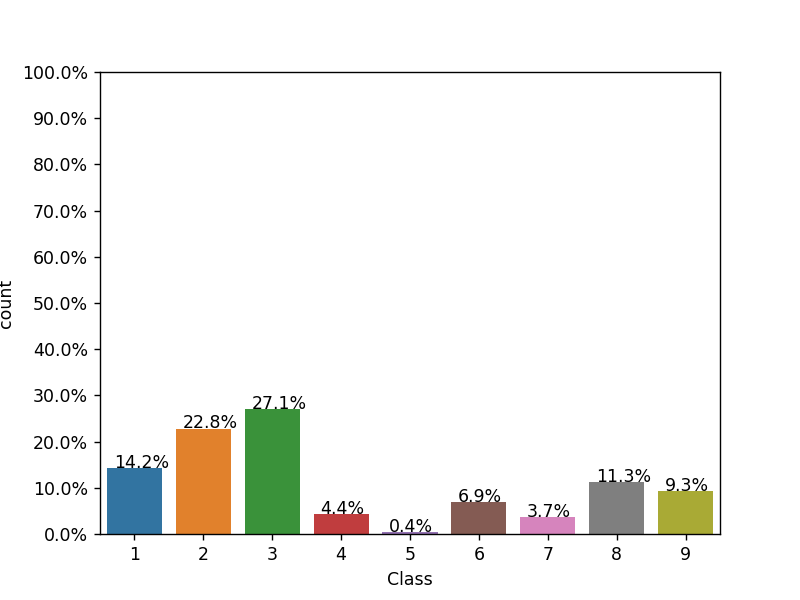

In [2]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [18]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

Empty DataFrame
Columns: [ID, size, Class]
Index: []


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


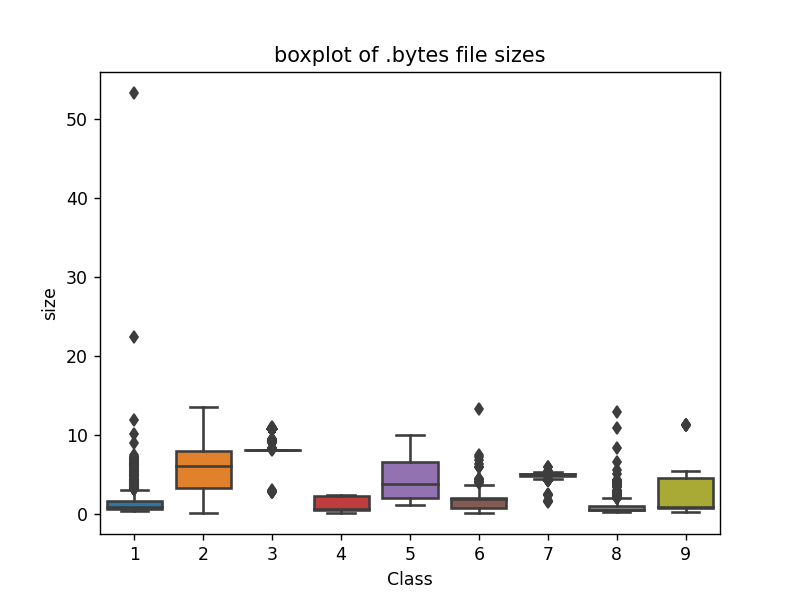

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [3]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

KeyboardInterrupt: 

In [6]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804,3687,3101,3211,3097,2758,3099,2759,5753,1824
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451,6536,439,281,302,7639,518,17001,54902,8588


In [7]:
print(byte_features.shape)

(10868, 258)


In [8]:
data_size_byte.head(2)

,ID,size,Class
0,fwMvl83WJ5KB01UN4ckC,8.099609,3
1,HsVToFPyNZdRic2hfQgA,0.821289,2


In [9]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,5.012695,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,6.556152,2


In [9]:
print(byte_features_with_size.shape)

(10868, 260)


In [17]:
# https://stackoverflow.com/a/29651514
# def normalize(df):
#     result1 = df.copy()
#     for feature_name in df.columns:
#         if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
#             max_value = df[feature_name].max()
#             min_value = df[feature_name].min()
#             result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result1
# result = normalize(byte_features_with_size)

In [11]:
result.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,...,0.01356,0.013107,0.013634,0.031724,0.014549,0.014348,0.007843,0.000129,0.092219,9
1,01IsoiSMh5gxyDYTl4CB,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,...,0.00192,0.001147,0.001329,0.087867,0.002432,0.088411,0.074851,0.000606,0.121237,2


In [12]:
print(result.shape)

(10868, 260)


In [13]:
data_y = result['Class']
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,...,0.013560,0.013107,0.013634,0.031724,0.014549,0.014348,0.007843,0.000129,0.092219,9
1,01IsoiSMh5gxyDYTl4CB,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,...,0.001920,0.001147,0.001329,0.087867,0.002432,0.088411,0.074851,0.000606,0.121237,2
2,01jsnpXSAlgw6aPeDxrU,0.040827,0.013434,0.001429,0.001315,0.005464,0.005280,0.005078,0.002155,0.008104,...,0.009804,0.011777,0.012604,0.028423,0.013080,0.013937,0.067001,0.000033,0.084499,9
3,01kcPWA9K2BOxQeS5Rju,0.009209,0.001708,0.000404,0.000441,0.000770,0.000354,0.000310,0.000481,0.000959,...,0.002121,0.001886,0.002272,0.013032,0.002211,0.003957,0.010904,0.000984,0.010759,1
4,01SuzwMJEIXsK7A8dQbl,0.008629,0.001000,0.000168,0.000234,0.000342,0.000232,0.000148,0.000229,0.000376,...,0.001530,0.000853,0.001052,0.007511,0.001038,0.001258,0.002998,0.000636,0.006233,8


In [13]:
print(result.shape)

(10868, 260)


<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


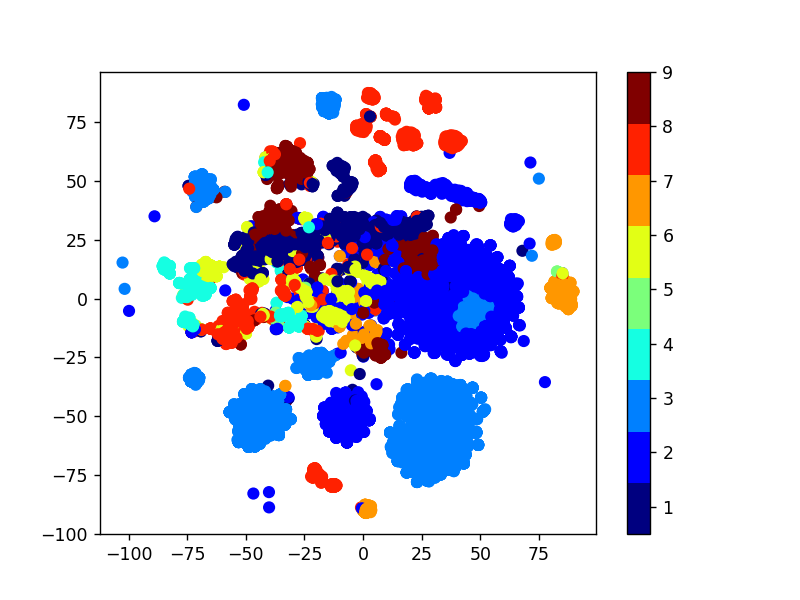

In [42]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


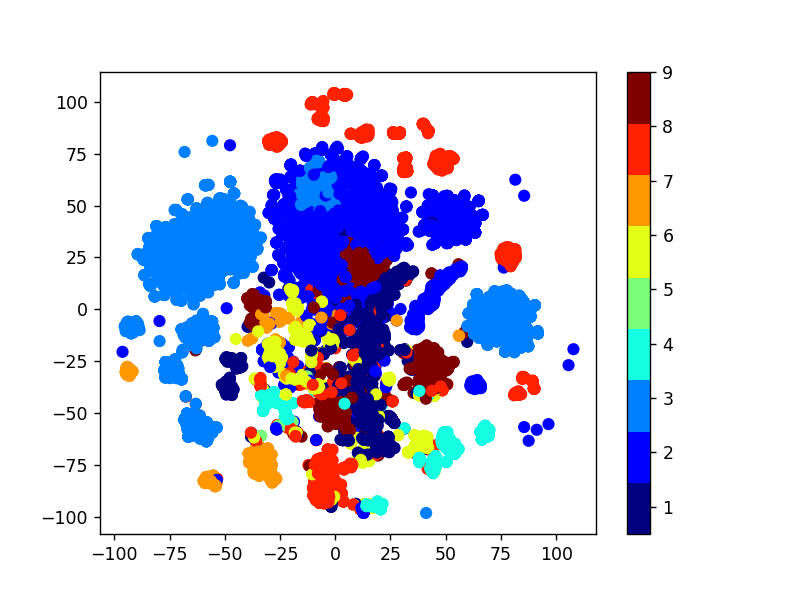

In [43]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<h1>4. Machine Learning Models</h1>

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
#ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
        
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [7]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,18,66,15,43,83,0,17,48,29,1
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,18,29,48,82,12,0,14,0,20,1
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,13,42,10,67,14,0,11,0,9,1
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,6,8,14,7,2,0,8,0,6,1
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,12,9,18,29,5,0,11,0,11,1


<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [15]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID      size  Class
0  gUSm1WN6PBYQabnrLs7h  0.178074      7
1  EV5y3k4OfPat2g0TAbHl  0.215920      3
2  i6HCJxaZV5cBzW1NUuof  0.172739      3
3  d9iovbGSauIRnmtK7e6E  0.139993      3
4  fiFAPn9E6NWzh2ad48R1  0.062369      1


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


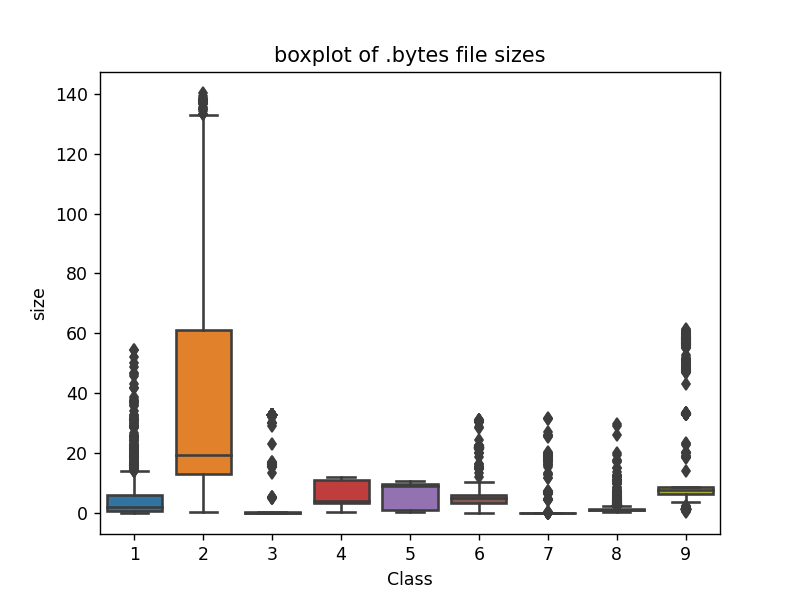

In [46]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [11]:
# add the file size feature to previous extracted features

asm_size_byte = pd.read_csv('asm_with_size.csv')
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
# del result_asm['0']
result_asm.head()

(10868, 57)
(10868, 4)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,ebp,esp,eip,Class,Unnamed: 0_x,size_asm_x,Unnamed: 0_y,size_asm_y,Unnamed: 0,size_asm
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,17,48,29,1,3,0.078190,3,0.078190,3,0.078190
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,14,0,20,1,438,0.063400,438,0.063400,438,0.063400
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,11,0,9,1,1139,0.041695,1139,0.041695,1139,0.041695
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,8,0,6,1,1347,0.018757,1347,0.018757,1347,0.018757
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,11,0,11,1,1415,0.037567,1415,0.037567,1415,0.037567


In [17]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173,1,0.000432
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,0.000328,0.000965,0.000686,0.000153,0.0,0.025362,0.000000,0.002188,1,0.000327
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,0.000475,0.000201,0.000560,0.000178,0.0,0.019928,0.000000,0.000985,1,0.000172
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,0.000090,0.000281,0.000059,0.000025,0.0,0.014493,0.000000,0.000657,1,0.000009
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,0.000102,0.000362,0.000243,0.000064,0.0,0.019928,0.000000,0.001204,1,0.000143


<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


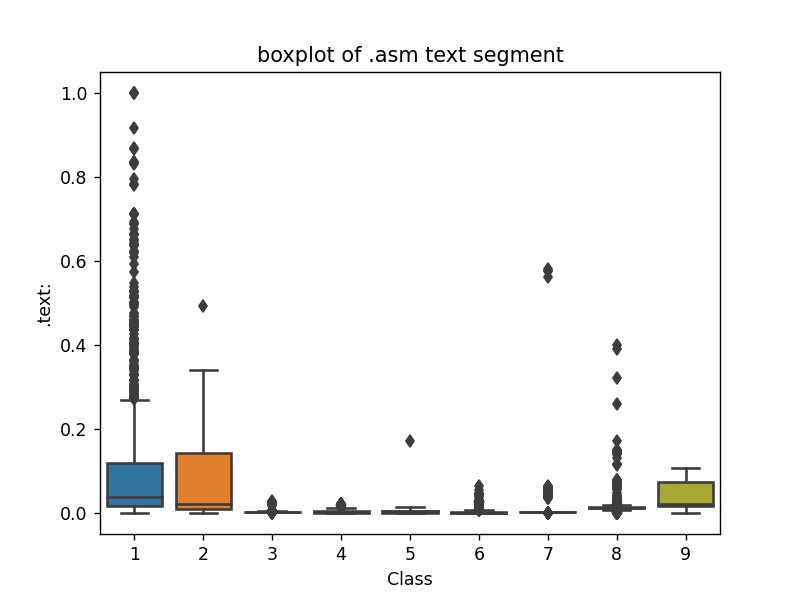

In [49]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


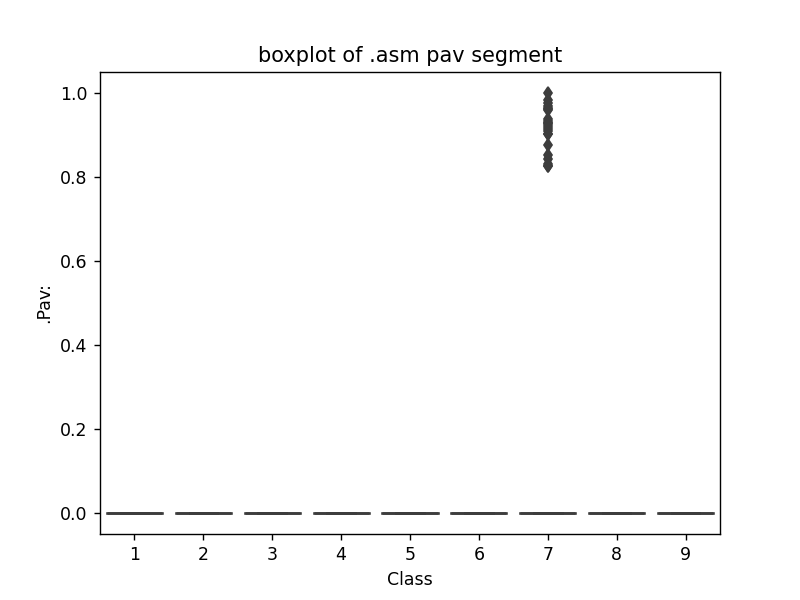

In [50]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


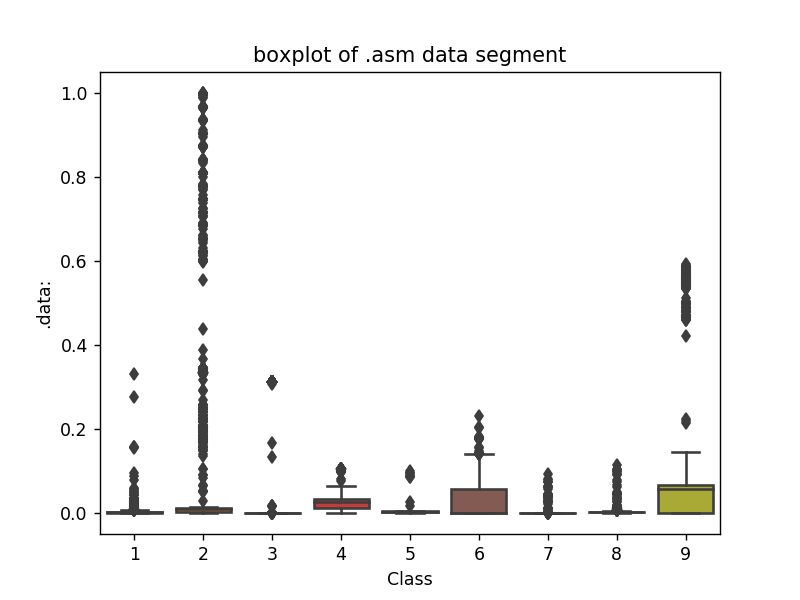

In [ ]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


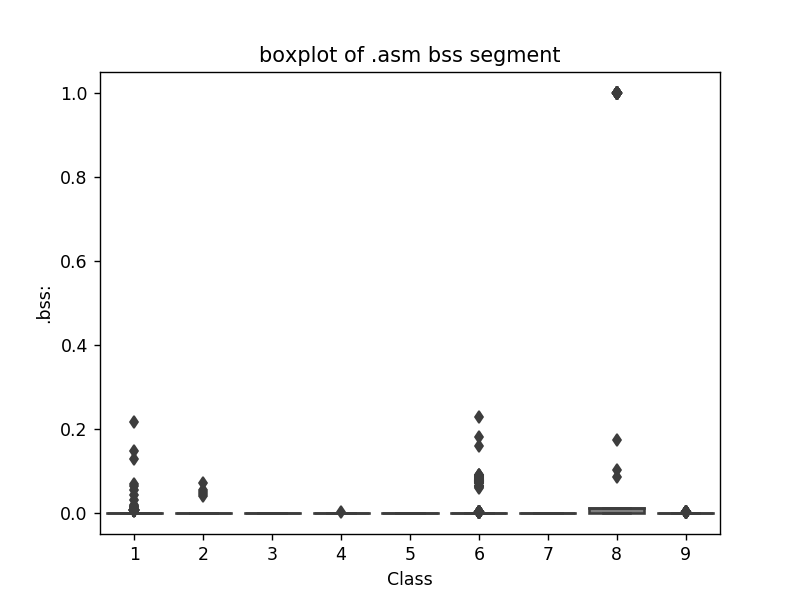

In [ ]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


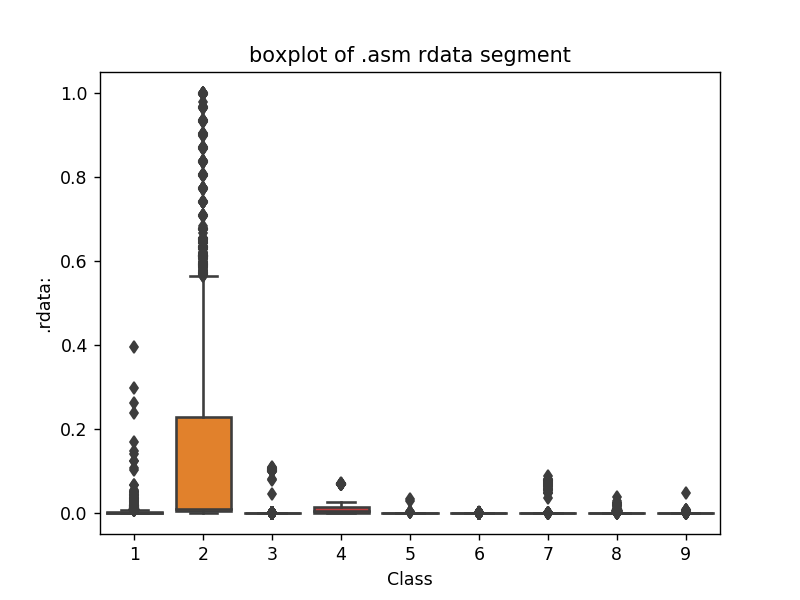

In [ ]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


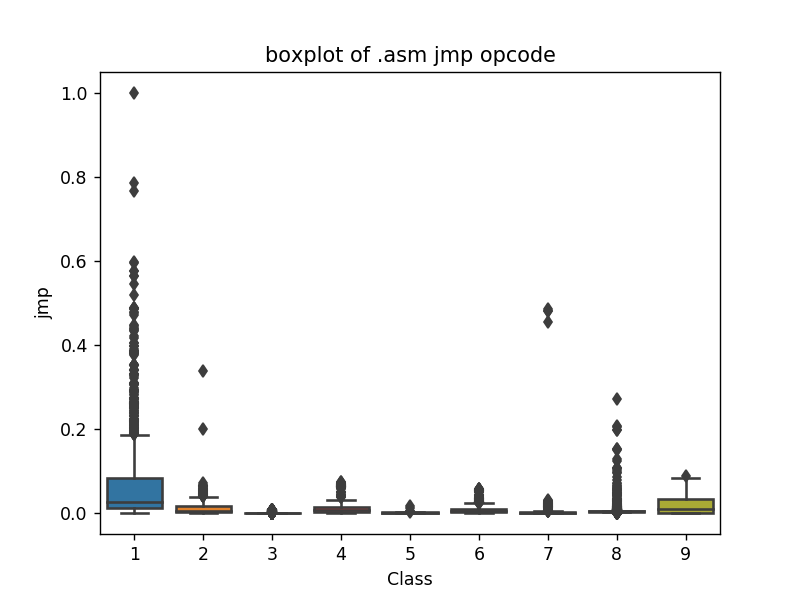

In [ ]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


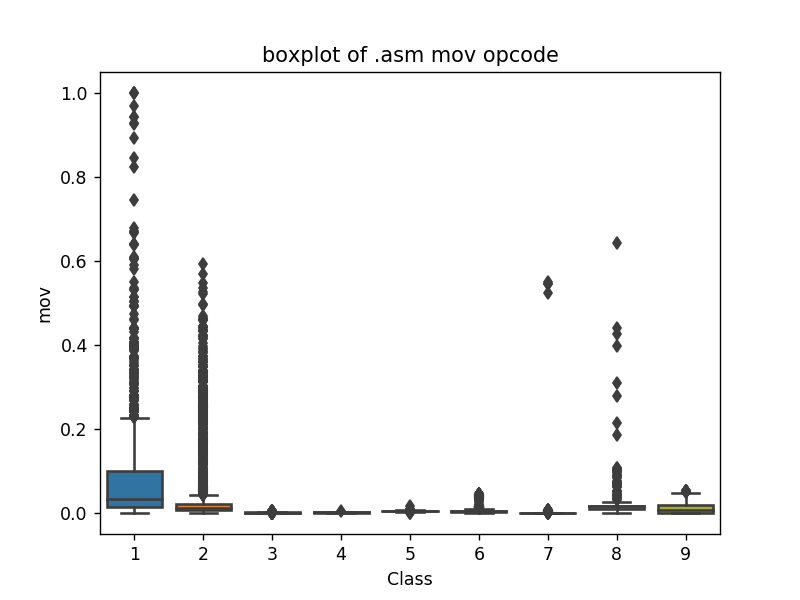

In [ ]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


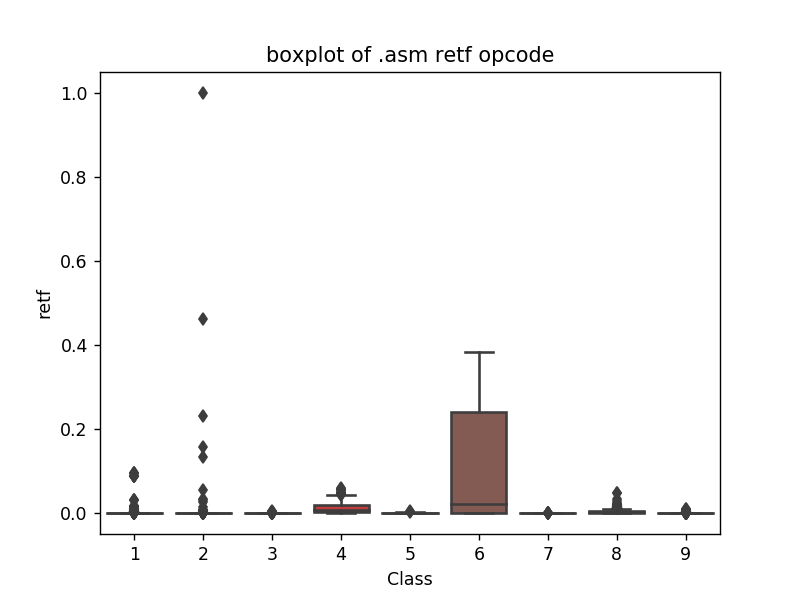

In [ ]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


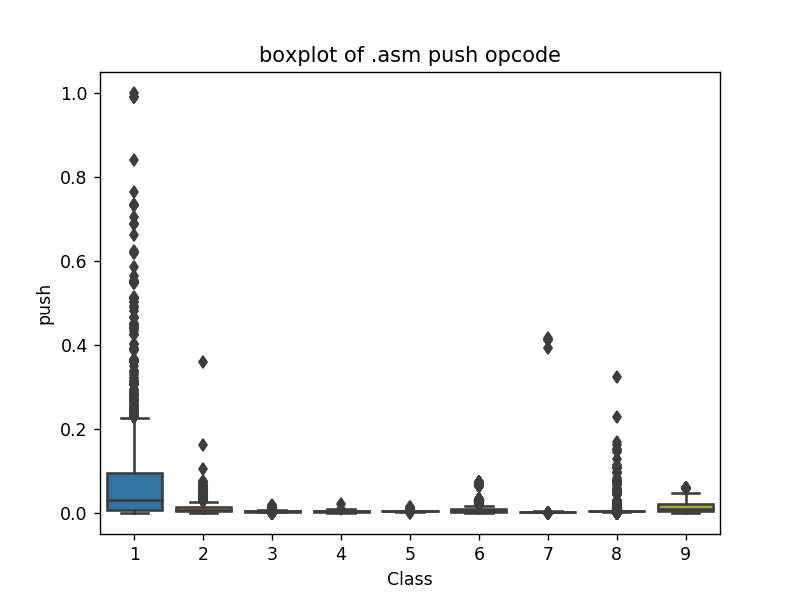

In [ ]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


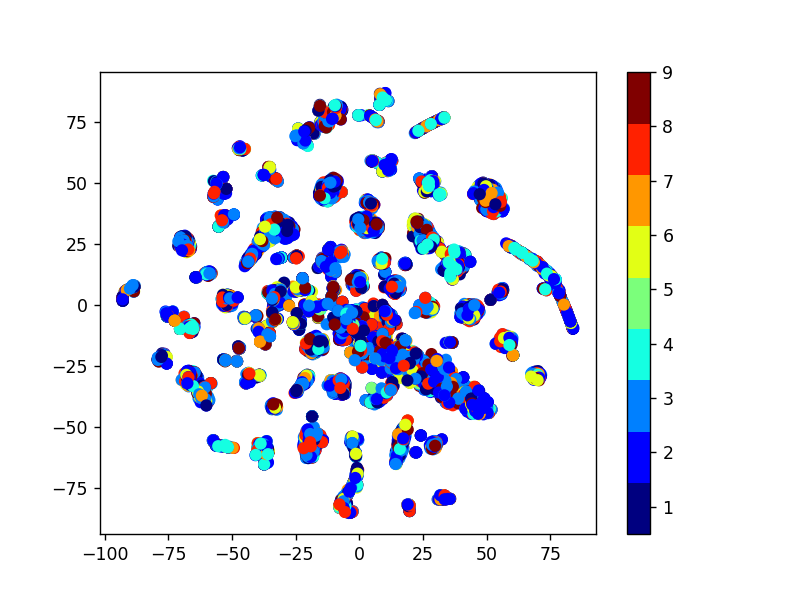

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


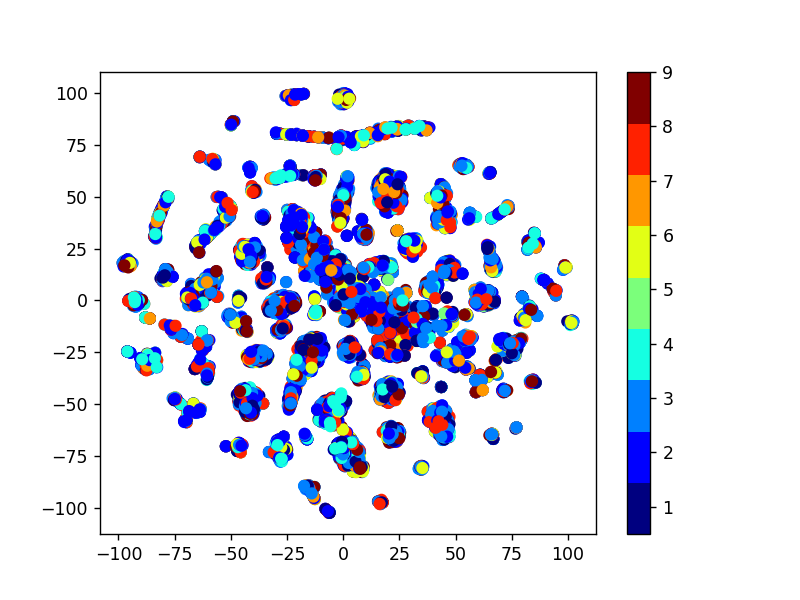

In [ ]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

# Byte Features - Bigram 

In [3]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       48 bits physical, 48 bits virtual
CPU(s):              8
On-line CPU(s) list: 0-7
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           1
NUMA node(s):        1
Vendor ID:           AuthenticAMD
CPU family:          23
Model:               49
Model name:          AMD EPYC 7B12
Stepping:            0
CPU MHz:             2249.998
BogoMIPS:            4499.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            512K
L3 cache:            16384K
NUMA node0 CPU(s):   0-7
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdr

In [3]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 ='output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)



In [9]:
source='byteFiles/'
files = os.listdir('byteFiles')
# data=range(0,10868)

# r.shuffle(data)
# count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[i],'first')
    elif i%5==1:
        shutil.move(source+files[i],'second')
    elif i%5 ==2:
        shutil.move(source+files[i],'third')
    elif i%5 ==3:
        shutil.move(source+files[i],'fourth')
    elif i%5==4:
        shutil.move(source+files[i],'fifth')

In [11]:
files = os.listdir('first')
print(len(files))

2174


In [15]:

from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from scipy.sparse import csr_matrix
import os

byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
byte_bigram_vocab = []
def byte_bigram():    
     for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])

byte_bigram() 
print(len(byte_bigram_vocab))
# print(byte_bigram_vocab[:5])

# vector = CountVectorizer(lowercase=False,ngram_range=(2,2),vocabulary=byte_bigram_vocab)
  

66049


In [ ]:
bytebigram_sparse = csr_matrix((10868,66049))   
for index, file in tqdm(enumerate(os.listdir('first'))):
    f = open('first/' + file)
    bytebigram_sparse[index,:]+= vector.transform([f.read().replace('\n', ' ').lower()])

scipy.sparse.save_npz('bytebigram_one.npz',bytebigram_sparse)
f.close()

In [14]:
sparse_matrix_one = scipy.sparse.load_npz('bytebigram_one.npz') 
print(sparse_matrix_one.todense())

[[6.462e+03 3.300e+01 2.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.585e+04 3.240e+02 3.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.970e+03 3.300e+01 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [20]:
sparse_matrix_one_new = sparse_matrix_one[0:2174,:]
print(sparse_matrix_one_new.todense())
print(sparse_matrix_one_new.todense().shape)

[[6.462e+03 3.300e+01 2.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.585e+04 3.240e+02 3.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.970e+03 3.300e+01 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [5.452e+03 5.700e+01 2.600e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.410e+03 3.800e+01 1.900e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.152e+03 4.200e+01 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [21]:
print(sparse_matrix_one_new.todense().shape)

(2174, 66049)


In [22]:
scipy.sparse.save_npz('bytebigram_one_new.npz',sparse_matrix_one_new)


In [23]:
sparse_matrix_one_new = scipy.sparse.load_npz('bytebigram_one_new.npz') 
print(sparse_matrix_one_new.todense())

[[6.462e+03 3.300e+01 2.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.585e+04 3.240e+02 3.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.970e+03 3.300e+01 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [5.452e+03 5.700e+01 2.600e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.410e+03 3.800e+01 1.900e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.152e+03 4.200e+01 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [16]:
files = os.listdir('second')
print(len(files))

2174


In [18]:
vector = CountVectorizer(lowercase=False,ngram_range=(2,2),vocabulary=byte_bigram_vocab)
bytebigram_sparse_two = csr_matrix((2174,66049))
for index, file in tqdm(enumerate(os.listdir('second'))):
    f = open('second/' + file)
    bytebigram_sparse_two[index,:]+= vector.transform([f.read().replace('\n', ' ').lower()])

scipy.sparse.save_npz('bytebigram_two.npz',bytebigram_sparse_two)
f.close()

2174it [2:20:43,  3.88s/it]


In [24]:
sparse_matrix_two = scipy.sparse.load_npz('bytebigram_two.npz') 
print(sparse_matrix_two.todense())

[[1.0466e+04 1.5600e+02 8.0000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.1443e+04 3.1500e+02 1.8300e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.0057e+04 4.7300e+02 2.5500e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.3017e+04 3.1200e+02 1.1800e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.5530e+03 1.3000e+02 4.6000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2460e+03 3.2000e+01 1.0000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


# Merging First And Second Sparse Matrices

In [25]:
from scipy.sparse import vstack
bytebigram_sparse_first_and_second = vstack((sparse_matrix_one_new,sparse_matrix_two)).tocsr()
print(bytebigram_sparse_first_and_second.shape)

(4348, 66049)


In [27]:
scipy.sparse.save_npz('bytebigram_one_two.npz',bytebigram_sparse_first_and_second)

In [26]:
files = os.listdir('third')
print(len(files))

2174


In [3]:
bytebigram_sparse_third = csr_matrix((2174,66049))
for index, file in tqdm(enumerate(os.listdir('third'))):
    f = open('third/' + file)
    bytebigram_sparse_third[index,:]+= vector.transform([f.read().replace('\n', ' ').lower()])

scipy.sparse.save_npz('bytebigram_third.npz',bytebigram_sparse_third)
f.close()

2174it [2:27:42,  4.08s/it]


In [4]:
files = os.listdir('fourth')
print(len(files))

2173


In [5]:
bytebigram_sparse_fourth = csr_matrix((2173,66049))
for index, file in tqdm(enumerate(os.listdir('fourth'))):
    f = open('fourth/' + file)
    bytebigram_sparse_fourth[index,:]+= vector.transform([f.read().replace('\n', ' ').lower()])

scipy.sparse.save_npz('bytebigram_fourth.npz',bytebigram_sparse_fourth)
f.close()

2173it [2:29:51,  4.14s/it]


In [6]:
files = os.listdir('fifth')
print(len(files))

2173


In [3]:
bytebigram_sparse_fifth = csr_matrix((2173,66049))
for index, file in tqdm(enumerate(os.listdir('fifth'))):
    f = open('fifth/' + file)
    bytebigram_sparse_fifth[index,:]+= vector.transform([f.read().replace('\n', ' ').lower()])

scipy.sparse.save_npz('bytebigram_fifth.npz',bytebigram_sparse_fifth)
f.close()

2173it [2:27:37,  4.08s/it]


In [9]:
sparse_matrix_one_two= scipy.sparse.load_npz('bytebigram_one_two.npz') 
print(sparse_matrix_one_two.todense())
print(sparse_matrix_one_two.todense().shape)

[[6.4620e+03 3.3000e+01 2.7000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.5850e+04 3.2400e+02 3.7000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.9700e+03 3.3000e+01 2.2000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.3017e+04 3.1200e+02 1.1800e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.5530e+03 1.3000e+02 4.6000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2460e+03 3.2000e+01 1.0000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
(4348, 66049)


In [10]:
sparse_matrix_third = scipy.sparse.load_npz('bytebigram_third.npz') 
print(sparse_matrix_third.todense())
print(sparse_matrix_third.todense().shape)

[[1.0683e+04 1.5400e+02 8.6000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.9282e+04 2.7800e+02 6.9000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.2062e+04 3.1600e+02 1.3100e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.8924e+04 7.1000e+01 1.5000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.3840e+03 5.5000e+01 8.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.6585e+04 2.6400e+02 6.6000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
(2174, 66049)


In [11]:
sparse_matrix_fourth = scipy.sparse.load_npz('bytebigram_fourth.npz') 
print(sparse_matrix_fourth.todense())
print(sparse_matrix_fourth.todense().shape)

[[2.60770e+04 3.32000e+02 1.28000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [8.39400e+03 1.41000e+02 6.20000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.00200e+03 3.70000e+01 1.40000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.60000e+03 5.00000e+00 2.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.43470e+04 3.24000e+02 1.67000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.50456e+05 8.93000e+02 7.27000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
(2173, 66049)


In [12]:
sparse_matrix_fifth = scipy.sparse.load_npz('bytebigram_fifth.npz') 
print(sparse_matrix_fifth.todense())
print(sparse_matrix_fifth.todense().shape)

[[1.2124e+04 2.3400e+02 1.0800e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.3410e+03 7.0000e+00 6.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.6310e+03 1.2000e+01 1.2000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.0260e+03 5.2000e+01 4.3000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.0870e+03 4.3000e+01 2.1000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.5698e+04 1.1900e+02 8.6000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
(2173, 66049)


# Merging All the 5 sparse Matrices

In [13]:
bytebigram_vect = vstack((sparse_matrix_one_two,sparse_matrix_third,sparse_matrix_fourth,sparse_matrix_fifth)).tocsr()
print(bytebigram_vect.shape)

(10868, 66049)


In [13]:
scipy.sparse.save_npz('bytebigram.npz',bytebigram_vect)

In [14]:
from sklearn.preprocessing import normalize
bytebigram_sparse_norm = normalize(scipy.sparse.load_npz('bytebigram.npz'), axis = 0)
print(bytebigram_sparse_norm)

  (0, 0)	0.0010838357849520615
  (1, 0)	0.007690168792951412
  (2, 0)	0.0010013153259306419
  (3, 0)	0.0034655238298792164
  (4, 0)	0.0035763897311254732
  (5, 0)	0.0006989080340289756
  (6, 0)	0.01707888370076038
  (7, 0)	0.010746780266948065
  (8, 0)	0.005510924231843065
  (9, 0)	0.0009619000660321995
  (10, 0)	0.00036027224792278367
  (11, 0)	0.0018387638053898871
  (12, 0)	0.0010523035770333077
  (13, 0)	0.0048219119439162515
  (14, 0)	0.0026525631289100672
  (15, 0)	5.03173530618413e-07
  (16, 0)	0.0055709696064968625
  (17, 0)	0.0022654549593543014
  (18, 0)	0.000988232814134563
  (19, 0)	0.006959560826493476
  (20, 0)	0.004677333416118561
  (21, 0)	0.003494372445634672
  (22, 0)	0.04762101383576743
  (23, 0)	0.003578570149758153
  (24, 0)	0.00031699932428960016
  :	:
  (10843, 65790)	0.009954599002088907
  (10844, 65790)	0.0021907518993444734
  (10845, 65790)	0.0006818345227267217
  (10846, 65790)	0.00013692199370902958
  (10847, 65790)	0.00635577092419617
  (10848, 65790)	0.020

# Important Feature Selection Using Random Forest

In [31]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

In [55]:
result_x=pd.read_csv("result_x",index_col =[0])

In [56]:
result_x.head()

,ID,0,1,2,3,4,5,6,7,8,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_x,size_y
0,01azqd4InC7m9JpocGv5,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,...,0.025875,0.025744,0.004910,0.008930,0.0,0.027174,0.000428,0.049896,0.400910,0.400910
1,01IsoiSMh5gxyDYTl4CB,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,...,0.012316,0.007858,0.007570,0.005350,0.0,0.043478,0.000673,0.024839,0.099719,0.099719
2,01jsnpXSAlgw6aPeDxrU,0.040827,0.013434,0.001429,0.001315,0.005464,0.005280,0.005078,0.002155,0.008104,...,0.006181,0.000100,0.003773,0.000713,0.0,0.048913,0.000000,0.012802,0.060553,0.060553
3,01kcPWA9K2BOxQeS5Rju,0.009209,0.001708,0.000404,0.000441,0.000770,0.000354,0.000310,0.000481,0.000959,...,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173,0.000432,0.000432
4,01SuzwMJEIXsK7A8dQbl,0.008629,0.001000,0.000168,0.000234,0.000342,0.000232,0.000148,0.000229,0.000376,...,0.013875,0.000482,0.012932,0.001363,0.0,0.027174,0.000000,0.008316,0.006983,0.006983


In [26]:
Y=pd.read_csv("trainLabels.csv")

In [27]:
print(Y.shape)


(10868, 2)


In [28]:
result_y=Y['Class']

In [29]:
result_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
# Important Feature Among Byte Bi-Gram

In [32]:
bytebigram_imp_features_indexes = imp_features(normalize(bytebigram_vect, axis = 0), byte_bigram_vocab, 300)

In [34]:
np.save('bytebigram_imp_features_indexes', bytebigram_imp_features_indexes)

In [35]:
bytebigram_imp_features_indexes = np.load('bytebigram_imp_features_indexes.npy')

In [36]:
top_byte_bi = np.zeros((10868, 0))
for i in bytebigram_imp_features_indexes:
    sliced = bytebigram_vect[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])
    
    

In [39]:
print(top_byte_bi)
print(top_byte_bi.shape)

[[6.4620e+03 3.0000e+01 1.3200e+02 ... 2.4000e+01 2.7000e+01 1.9000e+01]
 [4.5850e+04 9.1000e+01 2.7910e+03 ... 2.0000e+00 1.2000e+01 2.2000e+01]
 [5.9700e+03 2.9000e+01 1.9900e+02 ... 1.7000e+01 1.8000e+01 1.2000e+01]
 ...
 [6.0260e+03 3.7000e+01 1.0600e+02 ... 4.4000e+01 3.0000e+01 2.8000e+01]
 [6.0870e+03 2.5000e+01 1.5100e+02 ... 2.2000e+01 1.5000e+01 2.3000e+01]
 [2.5698e+04 8.2000e+01 6.3600e+02 ... 3.0000e+00 5.1000e+01 0.0000e+00]]
(10868, 300)


In [45]:
byte_bigram_df = pd.DataFrame(normalize(top_byte_bi),columns = np.take(byte_bigram_vocab,bytebigram_imp_features_indexes))

In [46]:
byte_bigram_df.head()

,00 00,fe ff,ff ff,30 00,58 50,00 53,02 00,53 51,00 8b,00 04,...,6f 6e,ff 5e,f2 f1,05 64,63 72,b4 bf,00 e2,ff 3f,00 22,a6 a6
0,0.993603,0.004613,0.020296,0.002614,0.003690,0.003690,0.004305,0.001538,0.003229,0.003537,...,0.001384,0.002921,0.079341,0.001691,0.002460,0.002153,0.001230,0.003690,0.004152,0.002921
1,0.995518,0.001976,0.060600,0.000890,0.000065,0.001324,0.003452,0.000000,0.001759,0.015720,...,0.008663,0.000152,0.000043,0.000000,0.000152,0.000000,0.000152,0.000043,0.000261,0.000478
2,0.991448,0.004816,0.033048,0.003155,0.004816,0.005646,0.004982,0.002159,0.010130,0.003820,...,0.002823,0.003986,0.082704,0.001329,0.002325,0.001329,0.002159,0.002823,0.002989,0.001993
3,0.996902,0.008829,0.015295,0.000338,0.000048,0.000096,0.002268,0.000145,0.015729,0.000724,...,0.001110,0.000096,0.000048,0.000096,0.000193,0.000000,0.000048,0.000048,0.000338,0.000000
4,0.868389,0.008227,0.189984,0.001059,0.000081,0.002484,0.005620,0.000204,0.010548,0.184608,...,0.002403,0.003747,0.000000,0.000041,0.000244,0.000285,0.000326,0.003380,0.000326,0.000000


In [47]:
byte_bigram_df.to_csv('byte_bigram_df.csv')

In [53]:
byte_bigram_df = pd.read_csv('byte_bigram_df.csv',index_col =[0])

In [54]:
byte_bigram_df.head()

,00 00,fe ff,ff ff,30 00,58 50,00 53,02 00,53 51,00 8b,00 04,...,6f 6e,ff 5e,f2 f1,05 64,63 72,b4 bf,00 e2,ff 3f,00 22,a6 a6
0,0.993603,0.004613,0.020296,0.002614,0.003690,0.003690,0.004305,0.001538,0.003229,0.003537,...,0.001384,0.002921,0.079341,0.001691,0.002460,0.002153,0.001230,0.003690,0.004152,0.002921
1,0.995518,0.001976,0.060600,0.000890,0.000065,0.001324,0.003452,0.000000,0.001759,0.015720,...,0.008663,0.000152,0.000043,0.000000,0.000152,0.000000,0.000152,0.000043,0.000261,0.000478
2,0.991448,0.004816,0.033048,0.003155,0.004816,0.005646,0.004982,0.002159,0.010130,0.003820,...,0.002823,0.003986,0.082704,0.001329,0.002325,0.001329,0.002159,0.002823,0.002989,0.001993
3,0.996902,0.008829,0.015295,0.000338,0.000048,0.000096,0.002268,0.000145,0.015729,0.000724,...,0.001110,0.000096,0.000048,0.000096,0.000193,0.000000,0.000048,0.000048,0.000338,0.000000
4,0.868389,0.008227,0.189984,0.001059,0.000081,0.002484,0.005620,0.000204,0.010548,0.184608,...,0.002403,0.003747,0.000000,0.000041,0.000244,0.000285,0.000326,0.003380,0.000326,0.000000


In [57]:
#result_x contains ASM features(Excluding Image) and Byte Features(Unigram and Size)


final_data_without_image = pd.concat([result_x,byte_bigram_df], axis = 1 join = 'inner')

In [58]:
final_data_without_image.to_csv('final_data_without_image')

In [8]:
import joblib
imgdf=joblib.load('imgdf')

In [60]:
#Combining Image Features Extracted From ASM with rest
final_data = pd.merge(final_data_without_image,imgdf, on='ID', how = 'left')

In [61]:
final_data.head()

,ID,0,1,2,3,4,5,6,7,8,...,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199
0,01azqd4InC7m9JpocGv5,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096
1,01IsoiSMh5gxyDYTl4CB,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,...,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486
2,01jsnpXSAlgw6aPeDxrU,0.040827,0.013434,0.001429,0.001315,0.005464,0.005280,0.005078,0.002155,0.008104,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096
3,01kcPWA9K2BOxQeS5Rju,0.009209,0.001708,0.000404,0.000441,0.000770,0.000354,0.000310,0.000481,0.000959,...,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232
4,01SuzwMJEIXsK7A8dQbl,0.008629,0.001000,0.000168,0.000234,0.000342,0.000232,0.000148,0.000229,0.000376,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096


In [62]:
final_data.to_csv('final_data_with_ID')

In [63]:
final_data = final_data.drop('ID', axis = 1)

In [64]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9,...,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199
0,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,0.003531,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096
1,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,0.000394,...,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486,0.059486
2,0.040827,0.013434,0.001429,0.001315,0.005464,0.005280,0.005078,0.002155,0.008104,0.002707,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096
3,0.009209,0.001708,0.000404,0.000441,0.000770,0.000354,0.000310,0.000481,0.000959,0.000521,...,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232,0.067232
4,0.008629,0.001000,0.000168,0.000234,0.000342,0.000232,0.000148,0.000229,0.000376,0.000246,...,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096,0.067096


In [65]:
final_data.to_csv('final_data.csv')


In [66]:
final_data = pd.read_csv('final_data.csv')

In [69]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(final_data, result_y, stratify = result_y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final, y_train_final, stratify = y_train_final, test_size = 0.20)

In [71]:


x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(x_train_final,y_train_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(x_train_final, y_train_final)
    
# predict_y = sig_clf.predict_proba(x_train_final)
# print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
# predict_y = sig_clf.predict_proba(X_cv_merge)
# print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print( "The test log loss is:",log_loss(y_test_final, predict_y))
# plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

[13:05:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [73]:
x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(x_train_final,y_train_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")

sig_clf.fit(x_train_final, y_train_final)
predict_y = sig_clf.predict_proba(x_train_final)
print ("The train log loss is:",log_loss(y_train_final, predict_y))

predict_y = sig_clf.predict_proba(x_cv_final)
print("The cross validation log loss is:",log_loss(y_cv_final, predict_y))

predict_y = sig_clf.predict_proba(x_test_final)
print( "The test log loss is:",log_loss(y_test_final, predict_y))

[14:33:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

<pre>
1. you need to donwload the train from kaggle, which is of size ~17GB, after extracting it will occupy ~128GB data your dirve

2. if you are having computation power limitations, you can try using google colab, with GPU option enabled (you can search for how to enable GPU in colab) or you can work with the Google Cloud, check this tutorials by one of our student: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg (we suggest you to use GCP over Colab)

3. To Extract the .7z file in google cloud, once after you upload the file into server, in your ipython notebook create a new cell and write thess commands
  a. !sudo apt-get install p7zip
  b. !7z x file_name.7z -o path/where/you/want/to/extract
  
https://askubuntu.com/a/341637
</pre>